# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
audit_risk_df = pd.read_csv("audit_risk.csv")
trial_df = pd.read_csv("trial.csv")

In [4]:
audit_risk_df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:
trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [6]:
trial_df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [5]:
# Droping repeating columns
audit_risk_df = audit_risk_df.drop(['Score_B.1','PROB'],axis=1)

In [6]:
#creating a new column audit_id
audit_risk_df['Audit_ID'] = range(1,len(audit_risk_df.index)+1)
trial_df['Audit_ID'] = range(1,len(trial_df.index)+1)

In [7]:
# creating dataframe with only required columns (we are not selecting location_id column since it is not of much use)
data = trial_df[['Audit_ID','Marks','MONEY_Marks','District','Loss','LOSS_SCORE','History_score']]

In [8]:
#combining two files on audit_id column
df = pd.merge(audit_risk_df,data,on='Audit_ID')

In [9]:
df = df.drop(['Audit_ID'],1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 775
Data columns (total 31 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CONTROL_RISK      776 non-null float64
Detection_Risk    776 non-null float64
Aud

In [13]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0.5,1.7148,1,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0.5,0.5108,0,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0.5,0.3096,0,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0.5,3.5060,1,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0.5,0.2832,0,2,2,2,0,2,2


In [14]:
df.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
Marks               3
MONEY_Marks         3
District            3
Loss                3
LOSS_SCORE          3
History_score       3
dtype: int64

In [15]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
dtype: int64

In [16]:
df.describe(include=['O'])

,LOCATION_ID
count,776
unique,45
top,8
freq,76


In [17]:
df[['Sector_score','LOCATION_ID']].groupby('LOCATION_ID').count().sort_values('LOCATION_ID',ascending=True)

,Sector_score
LOCATION_ID,
1,11
11,26
12,47
13,35
14,20
15,35
16,52
17,1
18,16


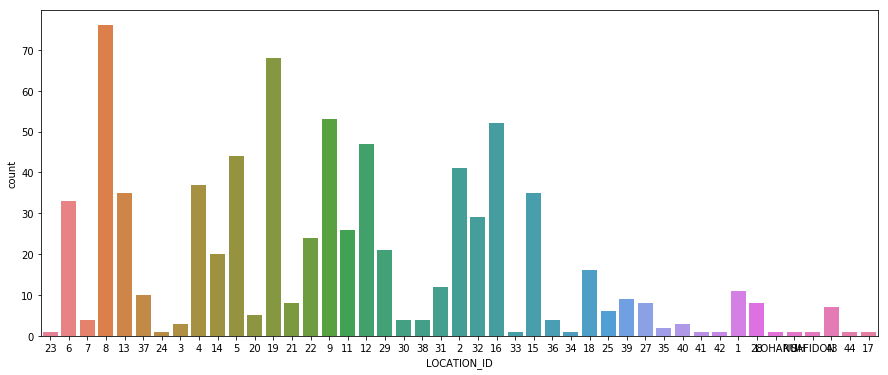

In [18]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='LOCATION_ID', data=df, palette ='husl')

In [10]:
drop_A=df.index[df["LOCATION_ID"] == 'SAFIDON'].tolist()
drop_B=df.index[df["LOCATION_ID"] == 'LOHARU'].tolist()
drop_C=df.index[df["LOCATION_ID"] == 'NUH'].tolist()
c =drop_A+drop_B+drop_C
df=df.drop(df.index[c])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 775
Data columns (total 31 columns):
Sector_score      773 non-null float64
LOCATION_ID       773 non-null object
PARA_A            773 non-null float64
Score_A           773 non-null float64
Risk_A            773 non-null float64
PARA_B            773 non-null float64
Score_B           773 non-null float64
Risk_B            773 non-null float64
TOTAL             773 non-null float64
numbers           773 non-null float64
Risk_C            773 non-null float64
Money_Value       772 non-null float64
Score_MV          773 non-null float64
Risk_D            773 non-null float64
District_Loss     773 non-null int64
RiSk_E            773 non-null float64
History           773 non-null int64
Prob              773 non-null float64
Risk_F            773 non-null float64
Score             773 non-null float64
Inherent_Risk     773 non-null float64
CONTROL_RISK      773 non-null float64
Detection_Risk    773 non-null float64
Aud

In [12]:
# df['Sector_score']=df['Sector_score'].astype(float)
df['LOCATION_ID']=df['LOCATION_ID'].astype(int)


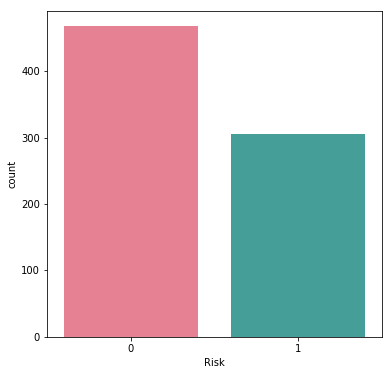

In [22]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Risk', data=df, palette ='husl')

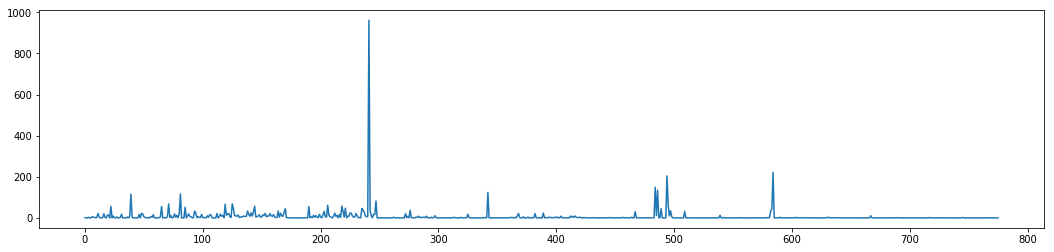

C:\Users\prava\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


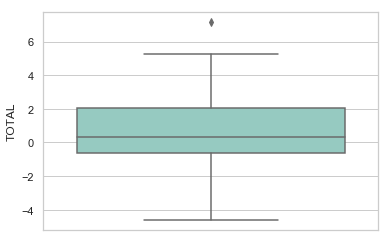

In [23]:
plt.figure(figsize=(18,4))


plt.plot(df.index,df['Audit_Risk'])
plt.show()

sns.set(style="whitegrid")
log_tot= np.log(df['TOTAL'])
ax1 = sns.boxplot(y=log_tot, data=df, palette ='Set3')

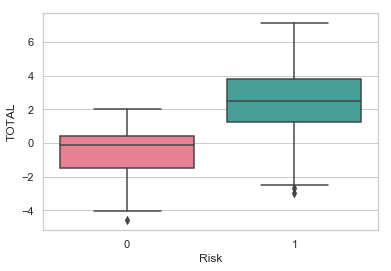

In [24]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(y=log_tot,x='Risk',data=df, palette ='husl')

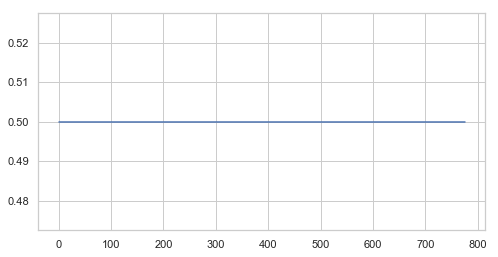

In [25]:
plt.figure(figsize=(8,4))
plt.plot(df.index,df['Detection_Risk'])
plt.show()

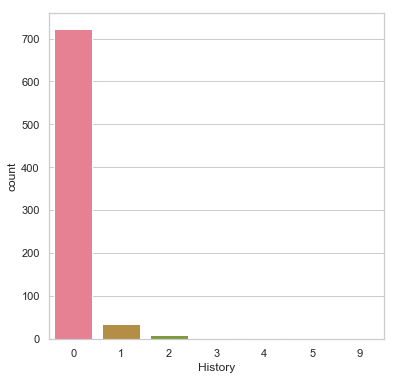

In [26]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='History', data=df, palette ='husl')

In [13]:
#dropping detection risk as it has constant value of 0.5
df = df.drop(['Detection_Risk'],1)
y_reg = df['Audit_Risk']

#PLOTTING SCATTER MATRIX

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271704783C8>,
      dtype=object)

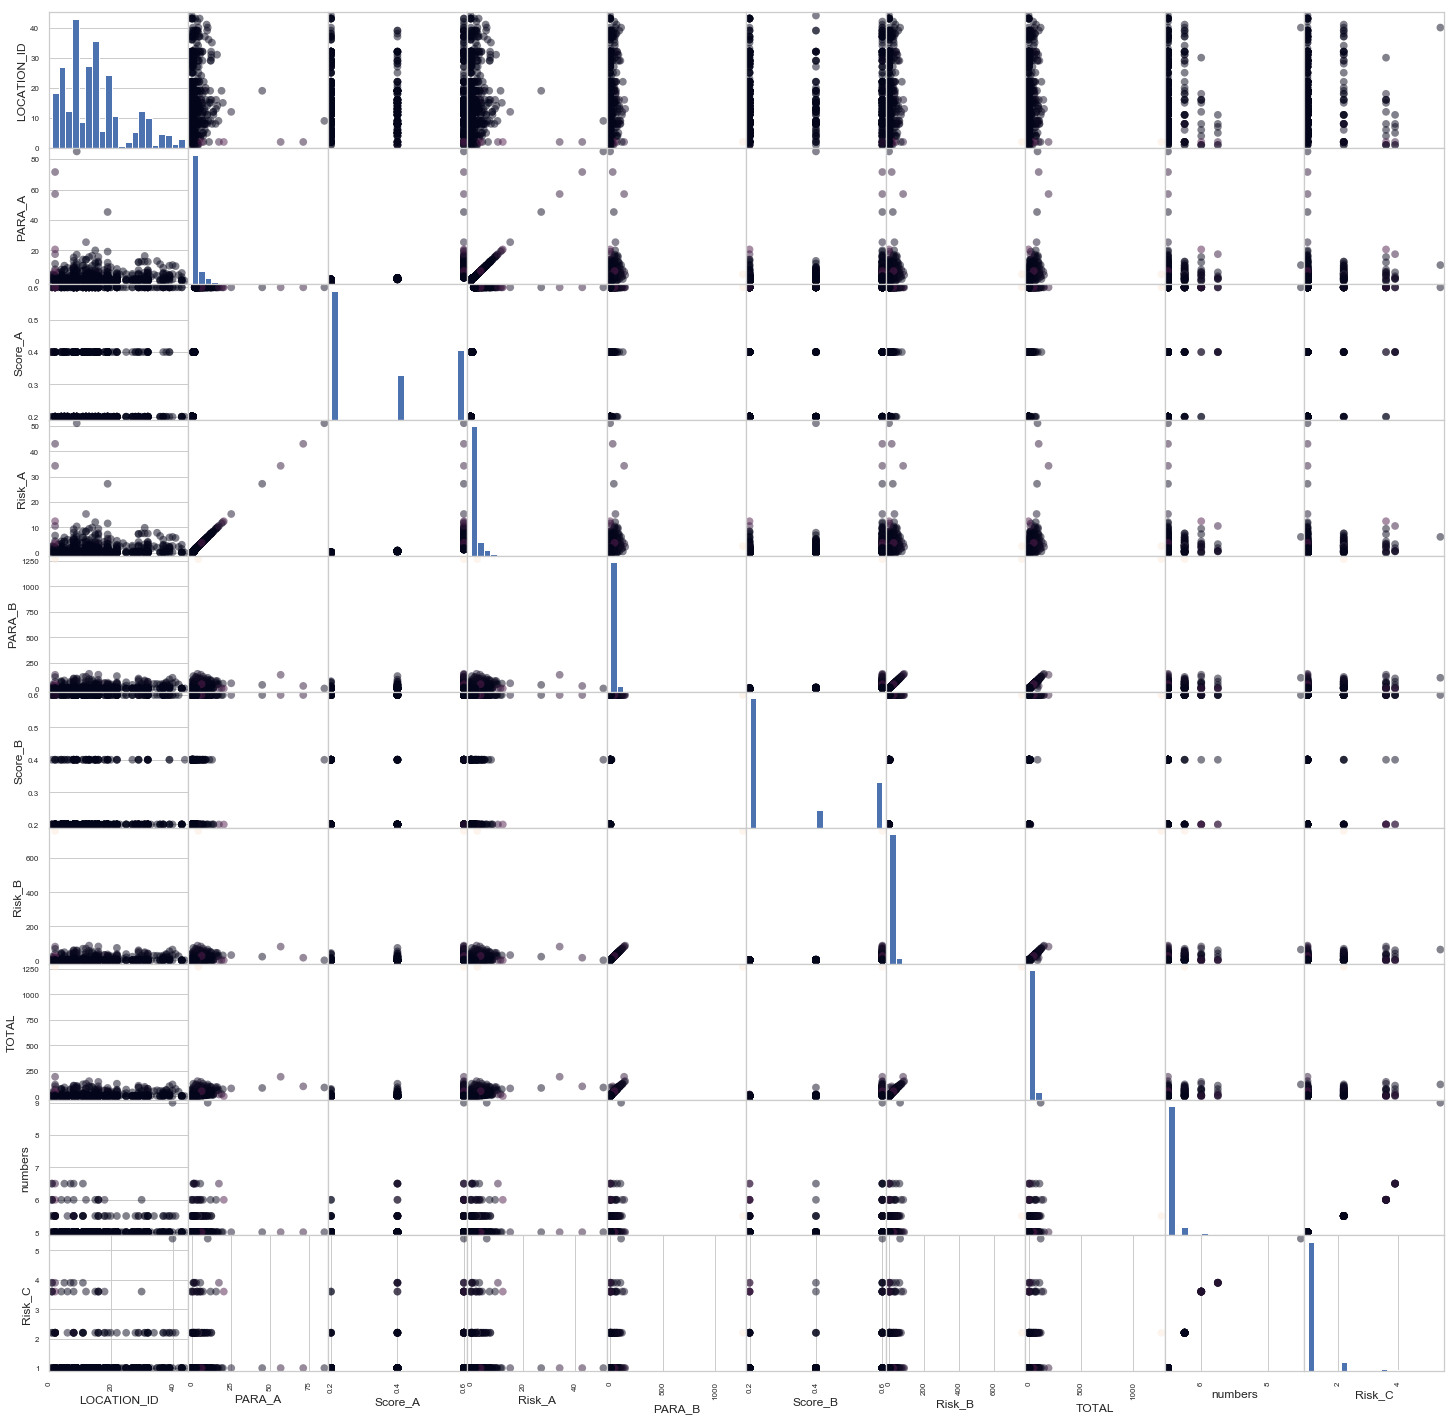

In [28]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import mglearn
x_plot1 = df.iloc[:,1:11]
# create a scatter matrix from the dataframe, color by y
pd.plotting.scatter_matrix(x_plot1, c=y_reg, figsize=(25, 25),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.5)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027171E97160>,
      dtype=object)

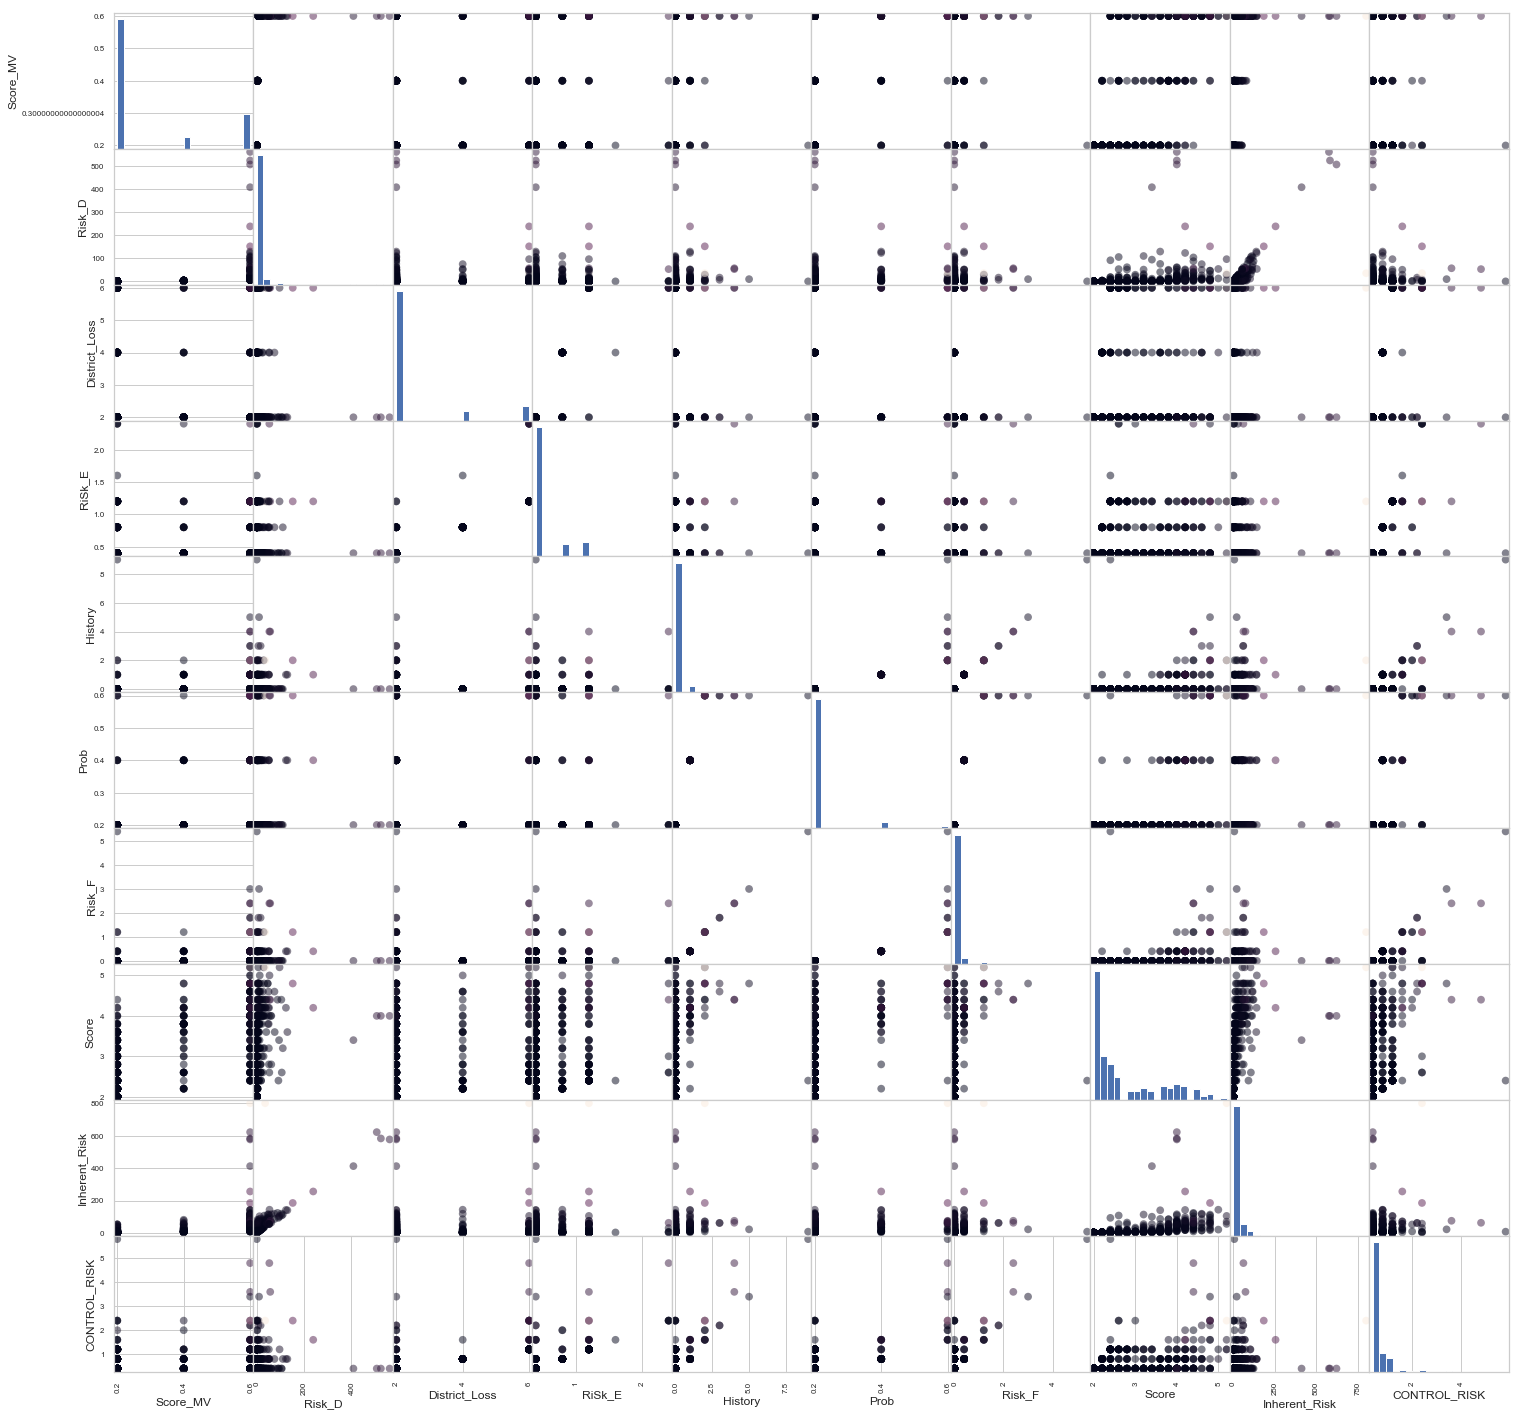

In [29]:
# Plotting scatter matrix for variables 12 to 21
x_plot1 = df.iloc[:,12:22]
# create a scatter matrix from the dataframe, color by y
pd.plotting.scatter_matrix(x_plot1, c=y_reg, figsize=(25, 25),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.5) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002717449DDD8>,
      dtype=object)

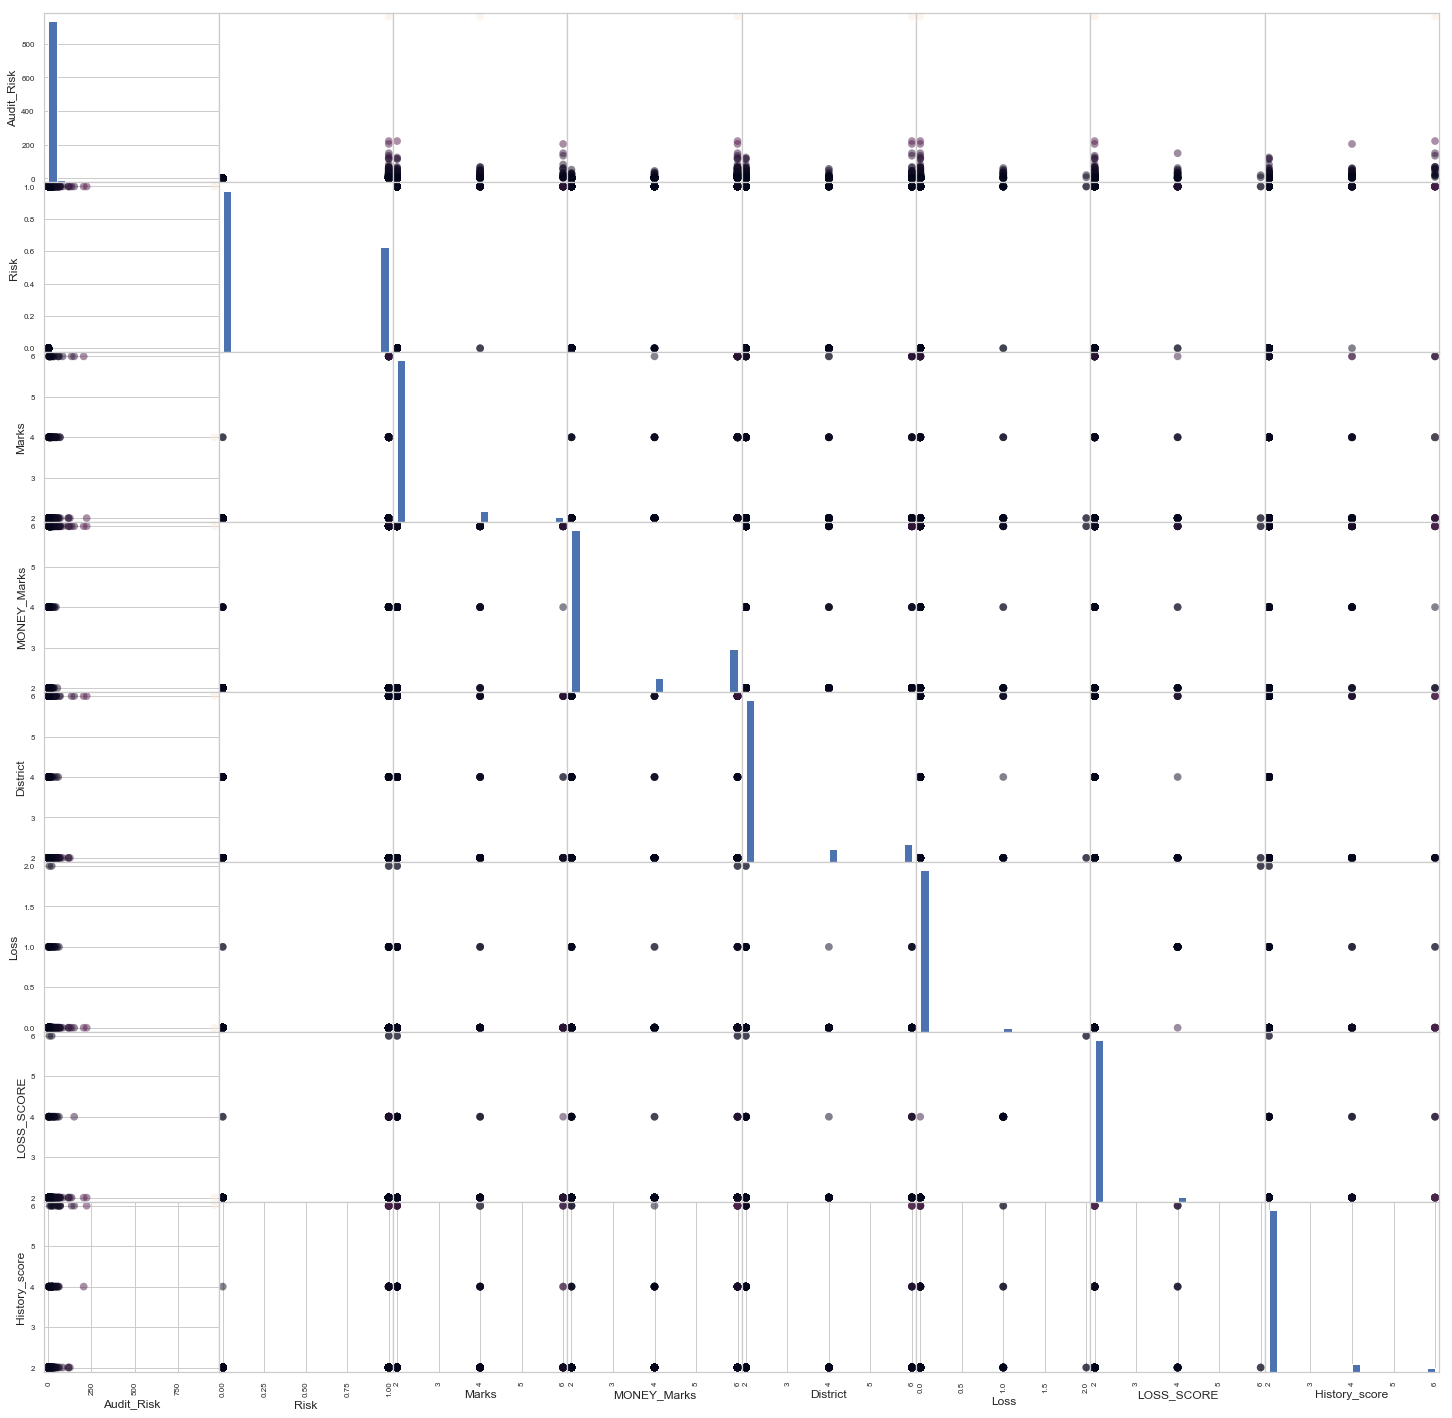

In [30]:
# Plotting scatter matrix for variables 22 to 31
x_plot1 = df.iloc[:,22:32]
# create a scatter matrix from the dataframe, color by y
pd.plotting.scatter_matrix(x_plot1, c=y_reg, figsize=(25, 25),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.5) 

# Plotting HeatMap

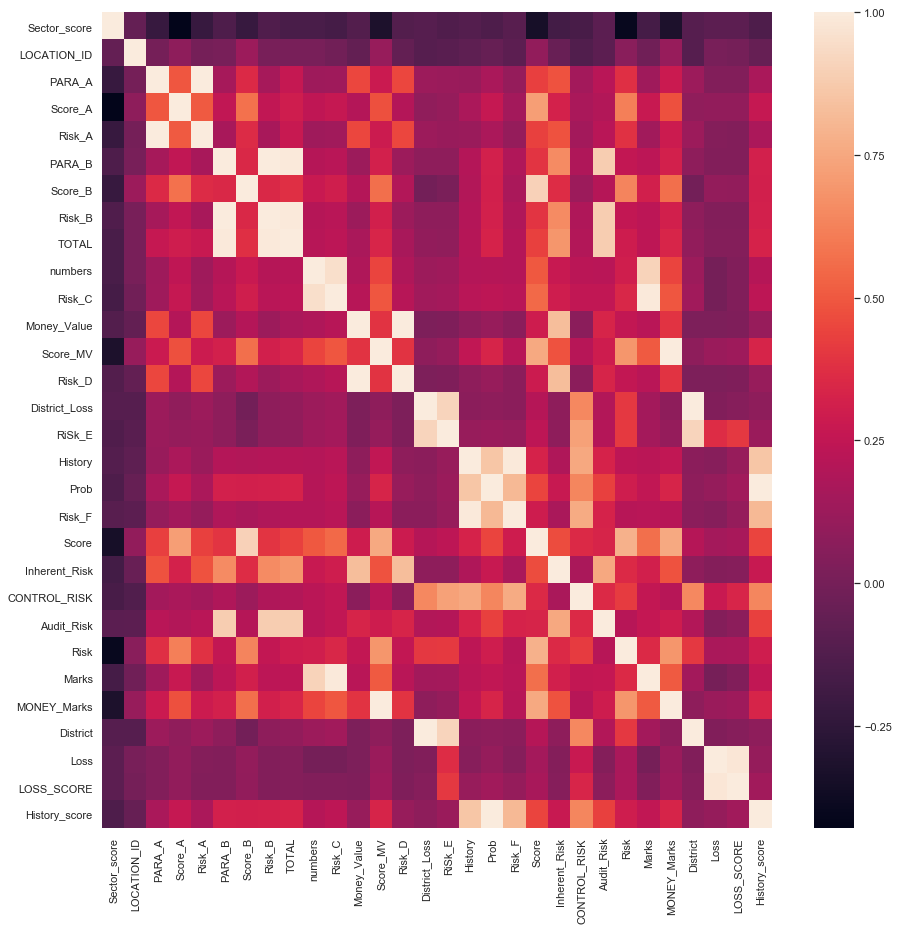

In [31]:
%matplotlib inline

import seaborn as sns; sns.set()
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr)

In [14]:
# Dropping Location_ID as its not a good predictor
# Sector_score has high correlation with PARA_A, Risk_A
# PARA_A is correlated with Risk_A
# PARA_B is correlated with Risk_B, TOTAL
# TOTAL is correlated with Risk_B
df = df.drop(['LOCATION_ID','Sector_score','PARA_A','PARA_B','TOTAL'],1)
# Risk_C is correlated with Marks, 
# Money_value is correlated with Risk_D
# Score_MV is correlated with MONEY_Marks
# District_Loss is correlated with District
# History is correlated with Risk_F
# Prob is correlated with History_score
# Loss is correlated with LOSS_SCORE
df= df.drop(['Risk_C','Money_Value','Score_MV','History','Prob','District_Loss','Loss'],1)

y_reg = df['Audit_Risk']
x_reg = df.drop(['Audit_Risk','Risk'],1)

In [15]:
x_reg.columns

Index(['Score_A', 'Risk_A', 'Score_B', 'Risk_B', 'numbers', 'Risk_D', 'RiSk_E',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Marks',
       'MONEY_Marks', 'District', 'LOSS_SCORE', 'History_score'],
      dtype='object')

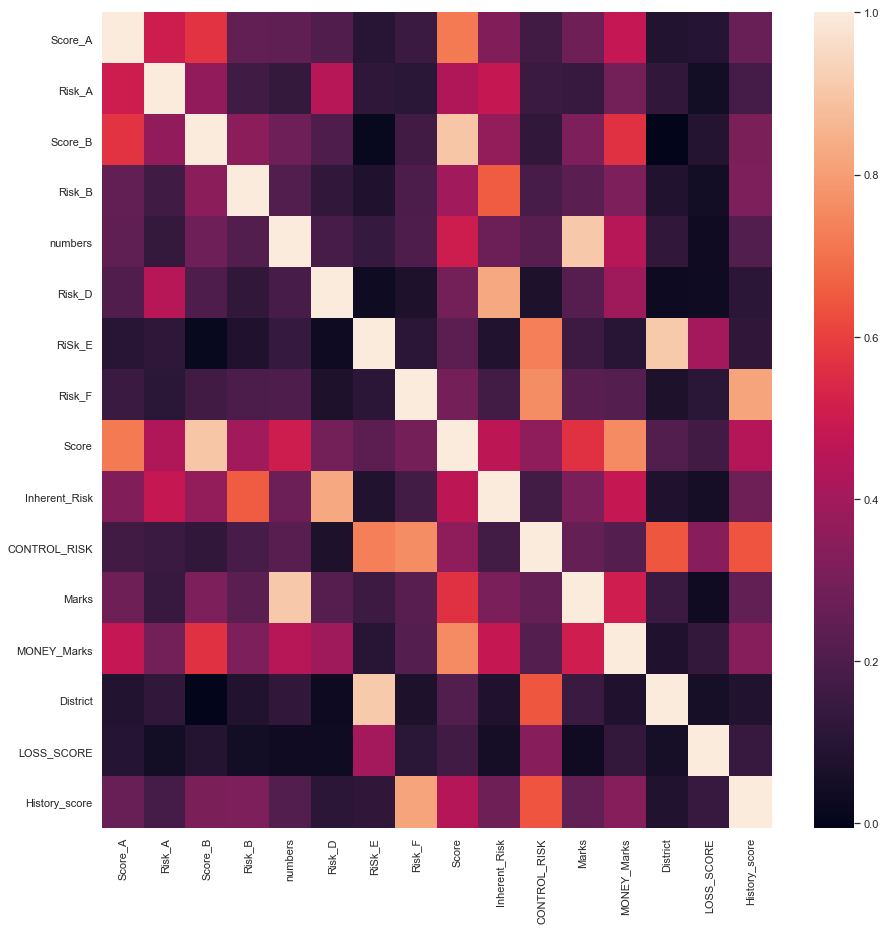

In [34]:
%matplotlib inline

import seaborn as sns; sns.set()
plt.figure(figsize=(15,15))
corr = x_reg.corr()
sns.heatmap(corr)

In [35]:
#Calculating the correlation values
columns = x_reg.columns
corr_list = [] 

for i in range(0,len(columns)-1):
   corr_list.append(np.corrcoef(x_reg.iloc[:,i] , y_reg)[0,1])

print(corr_list)

[0.20155649552588834, 0.22139978136556057, 0.20770830342161778, 0.8875556152688916, 0.22132627608463257, 0.334090647309609, 0.20277926533122376, 0.3276690440591013, 0.33288256599376986, 0.7508725449482542, 0.35787244662160955, 0.2595931137503304, 0.29153072982295924, 0.19922006840427914, 0.07372428944931315]


## Scaling the dataset using MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trans_minmax = scaler.fit_transform(x_reg)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linreg_MM = LinearRegression()

scores_MM = cross_val_score(linreg_MM, X_trans_minmax, y_reg, cv=10)
print("Cross-validation scores: {}".format(scores_MM))
print("Average cross-validation score: {:.2f}".format(scores_MM.mean()))

Cross-validation scores: [  -1.44784296   -0.27832284   -2.71922646    0.38120645    0.30285653
  -12.11969892    0.41160841    0.54921683  -10.62793907 -231.74818245]
Average cross-validation score: -25.73


# Scaling the dataset using StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
X_trans_stanscal = sc.fit_transform(x_reg)

In [23]:
scores_SS = cross_val_score(linreg_MM, X_trans_stanscal, y_reg,cv=5)
print("Cross-validation scores: {}".format(scores_SS))
print("Average cross-validation score: {:.2f}".format(scores_SS.mean()))

Cross-validation scores: [ -0.17607289   0.39009748  -0.59082568   0.41568805 -28.97992029]
Average cross-validation score: -5.79


Since cross validation score for Standard Scaler model is much better than MinMax Scaler model we will use Standard Scaler as our scaling model.

# Train Validation Test Split

In [24]:
from sklearn.model_selection import train_test_split
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_trans_stanscal, y_reg, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 434   size of validation set: 145   size of test set: 194



# KNeighbourRegressor

In [192]:
from sklearn.neighbors import KNeighborsRegressor

best_score = 0
for k in range(2,11):
    # train an KNeighbour Regressor
    knn_reg = KNeighborsRegressor(k)
    # perform cross-validation
    scores = cross_val_score(knn_reg, X_trainval, y_trainval, cv=10)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': k}

# rebuild a model on the combined training and validation set
knn_reg = KNeighborsRegressor(**best_parameters)
knn_reg.fit(X_trainval, y_trainval)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

In [193]:
test_score = knn_reg.score(X_test,y_test)
print("Test Accuracy: {:.2f}".format(test_score))
print("Best parameter: {}".format(best_parameters))

Test Accuracy: 0.22
Best parameter: {'n_neighbors': 4}


In [195]:
# Now recreating model using grid search
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

In [198]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 4}
Best cross-validation score: 0.59


In [199]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.tail())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.001888,0.000298,0.002601,0.000495,6,{'n_neighbors': 6},0.665746,0.744592,0.631169,0.840669,...,0.689457,0.689521,0.659379,0.712656,0.713149,0.725799,0.744406,0.705857,0.703631,0.022173
5,0.001887,0.000295,0.002483,0.000511,7,{'n_neighbors': 7},0.689681,0.705555,0.764049,0.792311,...,0.649649,0.656436,0.617804,0.678817,0.674531,0.697291,0.712773,0.673253,0.667284,0.025142
6,0.001799,0.000381,0.002267,0.000637,8,{'n_neighbors': 8},0.676174,0.699684,0.828291,0.749578,...,0.619714,0.620050,0.620020,0.650179,0.645944,0.679027,0.700473,0.662094,0.649143,0.025083
7,0.001595,0.000442,0.002777,0.001477,9,{'n_neighbors': 9},0.708814,0.704978,0.785544,0.711197,...,0.605880,0.612362,0.605395,0.647328,0.670784,0.661187,0.674670,0.639904,0.638978,0.024090
8,0.002273,0.000826,0.003055,0.000976,10,{'n_neighbors': 10},0.696524,0.704946,0.773278,0.680247,...,0.615637,0.604912,0.621371,0.624895,0.657577,0.639902,0.653989,0.649531,0.635422,0.016754


Text(0.5,0,'k neighbours')

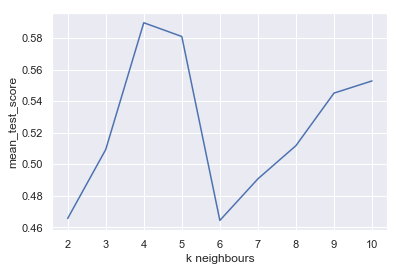

In [200]:
%matplotlib inline

# PLotting the mean_test_scores Vs no. of neighbours
data= pd.DataFrame(results.mean_test_score,param_grid['n_neighbors'])
sns.lineplot(y=results.mean_test_score,x=param_grid['n_neighbors'],data=data)
plt.xlabel('k neighbours')

In [265]:
# rebuild a model on the combined training and validation set with 4 nearest neighbour
knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print("Best parameter: {}".format(best_parameters))
print("Test Accuracy for KNN: {:.2f}".format(knn_reg.score(X_test,y_test)))

Best parameter: {'n_neighbors': 4}
Test Accuracy for KNN: 0.22


# Linear Regression using Normal Equation

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()

scores =[]
for cv in  range(2,11):
    scores.append(cross_val_score(linreg, X_trans_stanscal, y_reg, cv=cv).mean())
print("Cross-validation scores: {}".format(scores))
# print("Average cross-validation score: {:.2f}".format(np.mean(scores)))

Cross-validation scores: [0.13084606923291076, 0.1464005595320749, -0.010117446696833787, -5.788206666947507, -3.4875747028171666, -3.1504591076861126, -29.753470545746932, -29.341209460334117, -25.61115729866836]


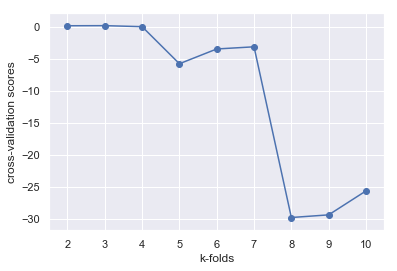

In [281]:
%matplotlib inline
cv = range(2,11)
data= pd.DataFrame(scores,np.array(cv))
sns.lineplot(y=scores,x=cv,data=data)
plt.xlabel('k-folds')
plt.ylabel('cross-validation scores')
plt.scatter(y=scores,x=cv)

In [282]:
# Linear Regression for kfold = 3
linreg = LinearRegression()
scores = cross_val_score(linreg, X_trainval, y_trainval, cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-1.22930837  0.74565761  0.59143774]
Average cross-validation score: 0.04


In [283]:
linreg.fit(X_trainval,y_trainval)

print("Test score for Linear Regression: {:.2f}".format(linreg.score(X_test,y_test)))

Test score for Linear Regression: 0.41


# Ridge Regressor

In [215]:
x_range = [0.01, 0.05, 0.1, 0.5, 1,1.5, 5, 10, 50, 100]
param_grid = {'alpha': x_range}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]}


In [218]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [219]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: 0.54


In [220]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001195,0.000596,0.000299,0.000457,0.01,{'alpha': 0.01},0.620749,0.829090,0.741009,0.608320,...,0.770797,0.779440,0.770423,0.783987,0.776017,0.791928,0.814869,0.775934,0.781406,0.012802
1,0.000995,0.000004,0.000399,0.000489,0.05,{'alpha': 0.05},0.620992,0.829039,0.741362,0.608696,...,0.770764,0.779413,0.770400,0.783971,0.775981,0.791904,0.814840,0.775908,0.781379,0.012802
2,0.001396,0.000488,0.000300,0.000458,0.1,{'alpha': 0.1},0.621322,0.829106,0.741795,0.609197,...,0.770758,0.779408,0.770397,0.783968,0.775975,0.791899,0.814835,0.775903,0.781375,0.012802
3,0.001097,0.000536,0.000399,0.000489,0.5,{'alpha': 0.5},0.623892,0.829727,0.745031,0.613064,...,0.770735,0.779387,0.770386,0.783949,0.775961,0.791895,0.814822,0.775891,0.781360,0.012803
4,0.001097,0.000300,0.000498,0.000498,1,{'alpha': 1},0.626887,0.830392,0.748582,0.617547,...,0.770684,0.779341,0.770363,0.783903,0.775936,0.791891,0.814799,0.775868,0.781330,0.012808


Text(0.5,0,'alpha')

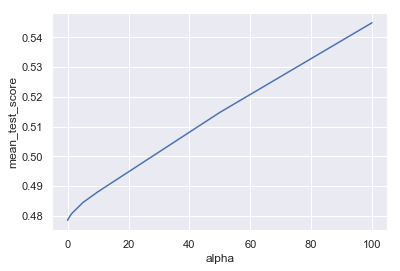

In [221]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['alpha'])
sns.lineplot(y=results.mean_test_score,x=param_grid['alpha'],data=data)
plt.xlabel('alpha')

In [263]:
# rebuild a model on the combined training and validation set
ridge = Ridge(alpha=100,random_state=0)
ridge.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print('Test score for Ridge Regressor: {:.4f}'.format(ridge.score(X_test, y_test)))

Test score: 0.3330


# Lasso Regressor

In [223]:
x_range = [0.01, 0.05, 0.1, 0.5, 1,1.5, 5, 10, 50, 100]
param_grid = {'alpha': x_range}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]}


In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

C:\Users\prava\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\prava\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\prava\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\prava\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [225]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1.5}
Best cross-validation score: 0.63


In [226]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.042764,0.110345,0.000299,0.000457,0.01,{'alpha': 0.01},0.627007,0.830086,0.749314,0.619134,...,0.770621,0.779262,0.770303,0.783839,0.775898,0.791878,0.814747,0.775827,0.781279,0.012813
1,0.002393,0.000798,0.000199,0.000399,0.05,{'alpha': 0.05},0.651358,0.828705,0.781821,0.651247,...,0.768549,0.777621,0.769543,0.782026,0.774891,0.791700,0.813748,0.774885,0.780104,0.012952
2,0.001695,0.000457,0.000199,0.000399,0.1,{'alpha': 0.1},0.665166,0.826470,0.796704,0.678922,...,0.767011,0.776670,0.769207,0.780600,0.774312,0.791076,0.813453,0.774336,0.779359,0.013075
3,0.000997,0.000446,0.000100,0.000299,0.5,{'alpha': 0.5},0.717199,0.822601,0.792610,0.777772,...,0.760441,0.767974,0.763931,0.776372,0.770276,0.786825,0.805337,0.769692,0.773954,0.012540
4,0.000698,0.000457,0.000499,0.000499,1,{'alpha': 1},0.769944,0.821789,0.765400,0.832073,...,0.752362,0.759503,0.755914,0.766889,0.763316,0.781164,0.795807,0.763126,0.766129,0.012313


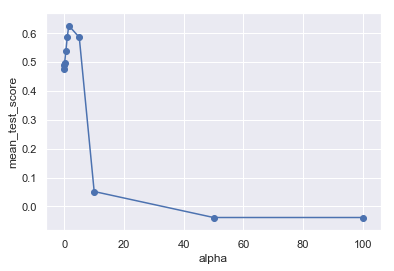

In [235]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['alpha'])
sns.lineplot(y=results.mean_test_score,x=param_grid['alpha'],data=data)
plt.xlabel('alpha')
plt.scatter(y=results.mean_test_score,x=param_grid['alpha'])

In [261]:
# rebuild a model on the combined training and validation set with alpha=1.5
lasso_reg = Lasso(alpha=1.5,random_state=0)
lasso_reg.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print('Test score for Lasso Regressor: {:.4f}'.format(lasso_reg.score(X_test, y_test)))

Test score for Lasso Regressor: 0.3344


# Polynomial Regressor

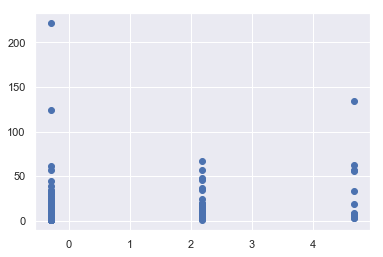

In [268]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,11].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg_poly = LinearRegression()

In [275]:
scores_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_trainval_poly = poly.fit_transform(X_trainval)
    scores_list.append(cross_val_score(linreg_poly, X_trainval_poly, y_trainval, cv=10).mean())


In [276]:
print("Cross-validation scores: {}".format(scores_list))

Cross-validation scores: [-1.850968474080705e+23, 0.8910419194314427]


We see that we are getting better accuracy for polynomial degree = 2

In [277]:
# Rebuilding the model with polynomial degree 2
poly = PolynomialFeatures(2)
X_trainval_poly = poly.fit_transform(X_trainval)
X_test_poly = poly.transform(X_test)

linreg_poly.fit(X_trainval_poly, y_trainval) 

# Score for model on testing dataset
print("Test Accuracy for Polynomial Regressor: {:.4f}".format(linreg_poly.score(X_test_poly,y_test)))

Test Accuracy for Polynomial Regressor: 1.00


# Linear SVR

In [1044]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}


In [1045]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [1046]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000799,0.000400,0.000497,0.000497,0.001,0.001,"{'C': 0.001, 'epsilon': 0.001}",-0.161370,-0.121096,-0.135507,...,-0.076645,-0.081021,-0.079411,-0.086687,-0.078037,-0.078780,-0.091931,-0.081420,-0.080949,0.004564
1,0.000698,0.000457,0.000297,0.000454,0.001,0.01,"{'C': 0.001, 'epsilon': 0.01}",-0.160950,-0.120527,-0.135404,...,-0.076565,-0.080894,-0.078616,-0.086501,-0.078013,-0.078666,-0.091837,-0.080949,-0.080700,0.004600
2,0.000498,0.000498,0.000400,0.000490,0.001,0.1,"{'C': 0.001, 'epsilon': 0.1}",-0.153286,-0.113115,-0.129247,...,-0.071631,-0.075947,-0.073948,-0.080706,-0.073007,-0.073857,-0.085905,-0.075891,-0.075626,0.004218
3,0.000895,0.000298,0.000100,0.000299,0.001,1,"{'C': 0.001, 'epsilon': 1}",-0.089472,-0.050384,-0.079584,...,-0.032272,-0.036080,-0.033554,-0.034706,-0.031766,-0.034257,-0.037805,-0.034313,-0.033894,0.001866
4,0.000598,0.000489,0.000400,0.000490,0.001,10,"{'C': 0.001, 'epsilon': 10}",-0.126558,-0.088379,-0.106386,...,-0.054422,-0.057159,-0.057781,-0.060559,-0.053573,-0.056530,-0.065101,-0.056111,-0.056707,0.003649


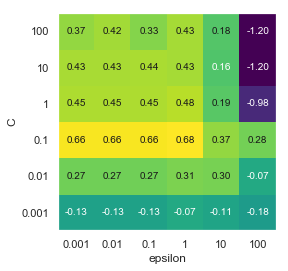

In [1047]:
%matplotlib inline
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='epsilon', xticklabels=param_grid['epsilon'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")


In [1048]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'epsilon': 1}
Best cross-validation score: 0.68


In [1049]:
# rebuild the model on training+validation dataset with best parameters
linsvr = LinearSVR(C=0.1,epsilon=1,random_state=0)
linsvr.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for LinearSVR: {:.4f}".format(linsvr.score(X_test,y_test)))

Test Accuracy for LinearSVR with PCA: 0.1938


# SVM Regressor with kernel

In [1050]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['poly', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']}


In [1051]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVR(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [1052]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.035704,0.073973,0.000699,4.575244e-04,0.001,0.001,poly,"{'C': 0.001, 'epsilon': 0.001, 'kernel': 'poly'}",0.057479,0.177254,...,0.252325,0.244229,0.250533,0.330397,0.306037,0.303587,0.356640,0.301499,0.294278,0.034241
1,0.011868,0.001753,0.000998,3.536319e-07,0.001,0.001,rbf,"{'C': 0.001, 'epsilon': 0.001, 'kernel': 'rbf'}",-0.168245,-0.129709,...,-0.082393,-0.086742,-0.084854,-0.094818,-0.086230,-0.085642,-0.100090,-0.090075,-0.088067,0.005180
2,0.009676,0.001407,0.000699,4.576018e-04,0.001,0.01,poly,"{'C': 0.001, 'epsilon': 0.01, 'kernel': 'poly'}",0.057669,0.177005,...,0.252180,0.244322,0.250585,0.330314,0.306163,0.303661,0.356562,0.301316,0.294256,0.034219
3,0.011965,0.001332,0.001098,2.993301e-04,0.001,0.01,rbf,"{'C': 0.001, 'epsilon': 0.01, 'kernel': 'rbf'}",-0.168699,-0.130028,...,-0.082452,-0.086843,-0.085055,-0.094910,-0.086373,-0.085583,-0.100047,-0.090034,-0.088150,0.005134
4,0.008081,0.000541,0.000698,4.566394e-04,0.001,0.1,poly,"{'C': 0.001, 'epsilon': 0.1, 'kernel': 'poly'}",0.057139,0.177109,...,0.252444,0.243861,0.250035,0.330101,0.305602,0.303319,0.356108,0.301106,0.293984,0.034179


In [251]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'epsilon': 1, 'kernel': 'poly'}
Best cross-validation score: 0.67


In [259]:
# rebuild the model on training+validation dataset
svr = SVR(C=1,epsilon=1,kernel='poly')
svr.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for SVR with kernel: {:.4f}".format(svr.score(X_test,y_test)))

Test Accuracy for SVR: -0.6198


In [284]:
print("Test Accuracy for KNN Regressor: {:.2f}".format(knn_reg.score(X_test,y_test)))
print("Test score for Linear Regressor: {:.2f}".format(linreg.score(X_test,y_test)))
print('Test score for Ridge Regressor: {:.4f}'.format(ridge.score(X_test, y_test)))
print('Test score for Lasso Regressor: {:.4f}'.format(lasso_reg.score(X_test, y_test)))
print("Test Accuracy for Polynomial Regressor: {:.4f}".format(linreg_poly.score(X_test_poly,y_test)))
print("Test Accuracy for LinearSVR: {:.4f}".format(linsvr.score(X_test,y_test)))
print("Test Accuracy for SVR with kernel: {:.4f}".format(svr.score(X_test,y_test)))

Test Accuracy for KNN Regressor: 0.22
Test score for Linear Regressor: 0.41
Test score for Ridge Regressor: 0.3330
Test score for Lasso Regressor: 0.3344
Test Accuracy for Polynomial Regressor: 0.9984
Test Accuracy for LinearSVR: 0.3152
Test Accuracy for SVR with kernel: -0.6198


#The best model for our Data is polynomial regressor with polynomial degree 2, The model has an accuracy of 99.84% 

# #                                                Classification

In [287]:
y_reg = df['Risk']

# Train Validation Test Split

In [291]:
from sklearn.model_selection import train_test_split
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_trans_stanscal, y_reg, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 434   size of validation set: 145   size of test set: 194



# KNeighbour Classifier

In [292]:
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [293]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

In [294]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [295]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.97


In [296]:
# Summarizing the grid SearchCV results

import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.tail())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.000798,3.990413e-04,0.001096,0.000298,6,{'n_neighbors': 6},1.0,0.915254,0.965517,0.982759,...,0.963532,0.961612,0.969290,0.965451,0.967370,0.965517,0.959770,0.967433,0.964690,0.003237
5,0.000998,5.201679e-07,0.001296,0.000457,7,{'n_neighbors': 7},1.0,0.915254,0.965517,0.982759,...,0.969290,0.967370,0.969290,0.965451,0.971209,0.969349,0.967433,0.967433,0.968144,0.001764
6,0.000898,2.993644e-04,0.001196,0.000399,8,{'n_neighbors': 8},1.0,0.915254,0.965517,0.982759,...,0.967370,0.965451,0.965451,0.965451,0.967370,0.965517,0.965517,0.969349,0.966225,0.001549
7,0.000898,2.992871e-04,0.001296,0.000457,9,{'n_neighbors': 9},1.0,0.932203,0.982759,0.982759,...,0.973129,0.973129,0.967370,0.969290,0.969290,0.969349,0.969349,0.969349,0.969295,0.002591
8,0.000898,2.992875e-04,0.001397,0.000488,10,{'n_neighbors': 10},1.0,0.932203,0.982759,0.982759,...,0.965451,0.965451,0.965451,0.969290,0.965451,0.973180,0.965517,0.963602,0.965839,0.003323


Text(0.5,0,'k neighbours')

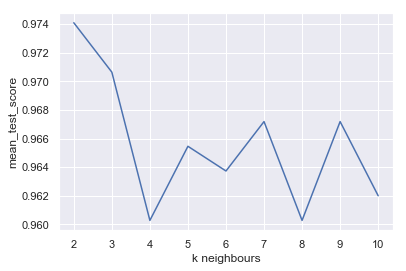

In [297]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['n_neighbors'])
sns.lineplot(y=results.mean_test_score,x=param_grid['n_neighbors'],data=data)
plt.xlabel('k neighbours')

In [301]:
# rebuild a model on the combined training and validation set with 2 neighbours
knn_class = KNeighborsClassifier(2)
knn_class.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print("Test Accuracy for KNN Classifier: {:.2f}".format(knn_class.score(X_test,y_test)))

Test Accuracy for KNN Classifier: 0.95


In [323]:
pred_knn_class = knn_class.predict(X_test)
from sklearn.metrics import confusion_matrix

print("Confusion matrix for KNN Classifier:\n{}".format(confusion_matrix(y_test, pred_knn_class)))

Confusion matrix for KNN Classifier:
[[120   1]
 [  9  64]]


# Linear SVC

In [303]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [500,1000,1500,5000,7500, 10000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [500, 1000, 1500, 5000, 7500, 10000]}


In [304]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

In [306]:
# Summarizing GridSearchCV results

import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007701,0.015894,0.000387,0.000510,0.001,500,"{'C': 0.001, 'max_iter': 500}",0.983051,0.898305,0.982759,...,0.950096,0.952015,0.959693,0.953935,0.957774,0.954023,0.948276,0.94636,0.951833,0.004331
1,0.002548,0.000486,0.000245,0.000374,0.001,1000,"{'C': 0.001, 'max_iter': 1000}",0.983051,0.898305,0.982759,...,0.950096,0.952015,0.959693,0.953935,0.957774,0.954023,0.948276,0.94636,0.951833,0.004331
2,0.002076,0.000567,0.000609,0.000499,0.001,1500,"{'C': 0.001, 'max_iter': 1500}",0.983051,0.898305,0.982759,...,0.950096,0.952015,0.959693,0.953935,0.957774,0.954023,0.948276,0.94636,0.951833,0.004331
3,0.003617,0.001275,0.001169,0.000903,0.001,5000,"{'C': 0.001, 'max_iter': 5000}",0.983051,0.898305,0.982759,...,0.950096,0.952015,0.959693,0.953935,0.957774,0.954023,0.948276,0.94636,0.951833,0.004331
4,0.002017,0.000623,0.000364,0.000451,0.001,7500,"{'C': 0.001, 'max_iter': 7500}",0.983051,0.898305,0.982759,...,0.950096,0.952015,0.959693,0.953935,0.957774,0.954023,0.948276,0.94636,0.951833,0.004331


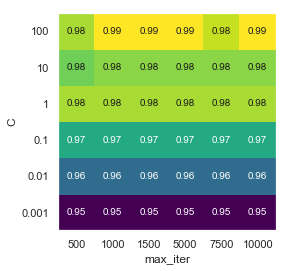

In [307]:
%matplotlib inline
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='max_iter', xticklabels=param_grid['max_iter'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")


In [308]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'max_iter': 1000}
Best cross-validation score: 0.99


In [310]:
# rebuild the model on training+validation dataset on the best parameters
linsvc = LinearSVC(C=100,random_state=0,max_iter=1000)
linsvc.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for LinearSVC Classifier: {:.4f}".format(linsvc.score(X_test,y_test)))

Test Accuracy for LinearSVC Classifier: 0.9794


In [324]:
pred_linsvc = linsvc.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_linsvc)
print("Confusion matrix for LinearSVC without kernel:\n{}".format(confusion))

Confusion matrix for LinearSVC without kernel:
[[121   0]
 [  4  69]]


# SVC with kernel

In [312]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['poly', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']}


In [316]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [315]:
# Summarizing GridSearchCV results

import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010811,0.006387,0.001693,0.000512,0.001,0.001,poly,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
1,0.022960,0.004066,0.002870,0.001049,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
2,0.011318,0.001886,0.001386,0.000810,0.001,0.01,poly,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
3,0.022476,0.002149,0.002561,0.000858,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
4,0.012708,0.001262,0.001941,0.000556,0.001,0.1,poly,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}",0.627119,0.661017,...,0.652591,0.648752,0.648752,0.654511,0.658349,0.649425,0.649425,0.657088,0.653043,0.003635


In [317]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 100, 'kernel': 'rbf'}
Best cross-validation score: 0.98


In [319]:
# rebuild the model on training+validation dataset with best parameters
svc_kernel = SVC(C=1,gamma=100,kernel='rbf',random_state=0)
svc_kernel.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for SVC with kernel trick: {:.4f}".format(svc_kernel.score(X_test,y_test)))

Test Accuracy for SVC with kernel trick: 0.9691


In [321]:
pred_svc = svc_kernel.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_svc)
print("Confusion matrix for SVC with kernel trick:\n{}".format(confusion))

Confusion matrix for SVC with kernel trick:
[[117   4]
 [  2  71]]


# Logistic Regression

In [325]:
from sklearn.linear_model import LogisticRegression
c_range = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C' : c_range}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [326]:
#taking C=10
logreg = LogisticRegression(C=10)

logreg.fit(X_trainval, y_trainval)
print("Train_Score: {}".format(logreg.score(X_train, y_train)))
print("Test_Score: {}".format(logreg.score(X_test, y_test)))

Train_Score: 0.9815668202764977
Test_Score: 0.979381443298969


In [327]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.98


In [328]:
# rebuild the model on training+validation dataset
log_reg = LogisticRegression(C=10,random_state=0)
log_reg.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for Logistic Regression: {:.4f}".format(log_reg.score(X_test,y_test)))

Test Accuracy for Logistic Regression: 0.9794


In [329]:
pred_log_reg = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_log_reg)
print("Confusion matrix for Logistic Regression:\n{}".format(confusion))

Confusion matrix for Logistic Regression:
[[121   0]
 [  4  69]]


# Decision Tree

In [330]:
param_grid = {'max_depth': [2,3,4 ]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [2, 3, 4]}


In [333]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [334]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.99


In [336]:
# rebuild the model on training+validation dataset
dtree = DecisionTreeClassifier(max_depth=2,random_state=0)
dtree.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for Decision Tree Classfier: {:.4f}".format(dtree.score(X_test,y_test)))

Test Accuracy for Decision Tree Classfier: 0.9948


In [338]:
pred_dtree = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix for Decision Tree Classfier:\n{}".format(confusion))

Confusion matrix for Decision Tree Classfier:
[[121   0]
 [  1  72]]


In [340]:
print("Test Accuracy for KNN Classifier: {:.2f}".format(knn_class.score(X_test,y_test)))
print("Test Accuracy for LinearSVC Classifier: {:.4f}".format(linsvc.score(X_test,y_test)))
print("Test Accuracy for SVC with kernel trick: {:.4f}".format(svc_kernel.score(X_test,y_test)))
print("Test Accuracy for Logistic Regression: {:.4f}".format(log_reg.score(X_test,y_test)))
print("Test Accuracy for Decision Tree Classfier: {:.4f}".format(dtree.score(X_test,y_test)))

Test Accuracy for KNN Classifier: 0.95
Test Accuracy for LinearSVC Classifier: 0.9794
Test Accuracy for SVC with kernel trick: 0.9691
Test Accuracy for Logistic Regression: 0.9794
Test Accuracy for Decision Tree Classfier: 0.9948


In [339]:
print("\nKNN Classifier")
print(confusion_matrix(y_test, pred_knn_class))
print("\nLinearSVC Classifier:")
print(confusion_matrix(y_test, pred_linsvc))
print("\nSVC with kernel Classifier")
print(confusion_matrix(y_test, pred_svc))
print("\nLogistic Regression Classifier")
print(confusion_matrix(y_test, pred_log_reg))
print("\nDecision Tree Classifier:")
print(confusion_matrix(y_test, pred_dtree))


KNN Classifier
[[120   1]
 [  9  64]]

LinearSVC Classifier:
[[121   0]
 [  4  69]]

SVC with kernel Classifier
[[117   4]
 [  2  71]]

Logistic Regression Classifier
[[121   0]
 [  4  69]]

Decision Tree Classifier:
[[121   0]
 [  1  72]]


Based on the results above we can say that decision tree classfier give the best accuracy for our data at 99.48%

# Project 2

### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# Regression Task

In [650]:
y_reg = df['Audit_Risk']

# Train Validation Test Split

In [651]:
from sklearn.model_selection import train_test_split
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_trans_stanscal, y_reg, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 434   size of validation set: 145   size of test set: 194



# Bagging

KNN with Bagging

In [805]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg_bag = KNeighborsRegressor(3)
bag_knn_reg = BaggingRegressor(knn_reg_bag, n_estimators=100, max_samples=80, bootstrap=True, random_state=0)

bag_knn_reg.fit(X_trainval, y_trainval)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=80, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [806]:
print('Train score for Knn Regressor with bagging : {:.2f}'.format(bag_knn_reg.score(X_trainval, y_trainval)))
print('Test score for KNN Regressor with bagging: {:.2f}'.format(bag_knn_reg.score(X_test, y_test)))

Train score for Knn Regressor with bagging : 0.52
Test score for KNN Regressor with bagging: 0.13


In [524]:
from  matplotlib.colors  import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [ ]:
%matplotlib notebook

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

Linear Regression with bagging

In [737]:
from sklearn.linear_model import LinearRegression
lr_reg_bag = LinearRegression()

bag_lr_reg = BaggingRegressor(lr_reg_bag, n_estimators=5, max_samples=200, bootstrap=True, random_state=0)

bag_lr_reg.fit(X_trainval,y_trainval)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [738]:
print('Train score for Linear Regressor with bagging : {:.2f}'.format(bag_lr_reg.score(X_trainval, y_trainval)))
print('Test score for Linear Regressor with bagging: {:.2f}'.format(bag_lr_reg.score(X_test, y_test)))

Train score for Linear Regressor with bagging : 0.69
Test score for Linear Regressor with bagging: 0.54


#Another method, Trying to find best parameters for bagging using grid search on Decision Tree Regressor

In [739]:
param_grid = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],'max_samples' : [0.05, 0.1, 0.2, 0.5]}

bag_dtree_reg = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(),bootstrap=True, random_state=0,n_estimators = 100, 
                                              max_features = 0.5),param_grid,n_jobs=-1)
bag_dtree_reg.fit(X_trainval, y_trainval)

print("Training score: {:.2f}".format(bag_dtree_reg.score(X_trainval,y_trainval)))
print("Tesing Score: {:.2f}".format(bag_dtree_reg.score(X_test,y_test)))

Training score: 0.89
Tesing Score: 0.22


In [740]:
print("Best Parameters: {}".format(bag_dtree_reg.best_params_))

Best Parameters: {'base_estimator__max_depth': 5, 'max_samples': 0.5}


In [753]:
# Rebuilding the baggingRegressor with best params
bag_dt_r = BaggingRegressor(DecisionTreeRegressor(max_depth=5),max_samples=0.5,bootstrap=True, random_state=0,n_estimators = 150,n_jobs=-1)
bag_dt_r.fit(X_trainval,y_trainval)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=150, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [754]:
print("Training score : {:.2f}".format(bag_dt_r.score(X_trainval,y_trainval)))
print("Tesing Score for Decision Tree Regressor with Bagging: {:.2f}".format(bag_dt_r.score(X_test,y_test)))

Training score : 0.90
Tesing Score for Decision Tree Regressor with Bagging: 0.20


We observe that the above bagging lead to overfitting the training set

# Pasting

KNN with Pasting

In [821]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg_pas = KNeighborsRegressor(3)
pas_knn_reg = BaggingRegressor(knn_reg_pas, n_estimators=100, max_samples=80, bootstrap=False, random_state=0)

pas_knn_reg.fit(X_trainval, y_trainval)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=80, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [822]:
print('Train score for KNN Regressor with pasting : {:.2f}'.format(pas_knn_reg.score(X_trainval, y_trainval)))
print('Test score for KNN Regressor with pasting: {:.2f}'.format(pas_knn_reg.score(X_test, y_test)))

Train score for Knn Regressor with pasting : 0.52
Test score for KNN Regressor with pasting: 0.13


Linear Regression with Pasting

In [841]:
from sklearn.linear_model import LinearRegression


pas_lr_reg = BaggingRegressor(LinearRegression(), n_estimators=1, max_samples=20, bootstrap=False, random_state=0)

pas_lr_reg.fit(X_trainval,y_trainval)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=20, n_estimators=1, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [843]:
print('Train score for Linear Regressor with Pasting : {:.2f}'.format(bag_lr_reg.score(X_trainval, y_trainval)))
print('Test score for Linear Regressor with Pasting: {:.2f}'.format(bag_lr_reg.score(X_test, y_test)))

Train score for Linear Regressor with Pasting : 0.69
Test score for Linear Regressor with Pasting: 0.54


# Adaboost

Decision Regressor with Adaboost

In [883]:
from sklearn.ensemble import AdaBoostRegressor

ada_dtree_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=300, learning_rate=0.9, random_state=0,loss='linear')
ada_dtree_reg.fit(X_trainval, y_trainval)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.9, loss='linear', n_estimators=300,
         random_state=0)

In [884]:
print('Train score for Decision Tree Regressor with Adaboost: {:.2f}'.format(ada_dtree_reg.score(X_trainval, y_trainval)))
print('Test score for Decision Tree Regressor with Adaboost: {:.2f}'.format(ada_dtree_reg.score(X_test, y_test)))

Train score for Decision Tree Regressor with Adaboost: 0.30
Test score for Decision Tree Regressor with Adaboost: 0.27


In [584]:
ada_dtree_reg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.27152207, 0.64293825,
       0.08553967, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

([<matplotlib.axis.YTick at 0x1fd3e258198>,
 <a list of 16 Text yticklabel objects>)

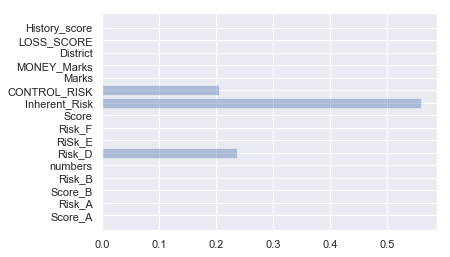

In [885]:
%matplotlib inline

y_list = ada_dtree_reg.feature_importances_
y_pos = np.arange(len(y_list))
features = x_reg.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

Linear SVR with Adaboost

In [915]:
from sklearn.ensemble import AdaBoostRegressor

ada_linsvr_reg = AdaBoostRegressor(LinearSVR(random_state=0), n_estimators=50, learning_rate=0.6, random_state=0)
ada_linsvr_reg.fit(X_trainval, y_trainval)
print('Train score for Decision Tree Regressor with Adaboost: {:.2f}'.format(ada_linsvr_reg.score(X_trainval, y_trainval)))
print('Test score for Decision Tree Regressor with Adaboost: {:.2f}'.format(ada_linsvr_reg.score(X_test, y_test)))

Train score for Decision Tree Regressor with Adaboost: 0.51
Test score for Decision Tree Regressor with Adaboost: 0.43


# Gradient Boosting Regression Task

In [985]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=2, learning_rate=0.5, random_state=42,)
gbrt_slow.fit(X_trainval, y_trainval)
print('Train score for Gradient Boost: {:.2f}'.format(gbrt_slow.score(X_trainval, y_trainval)))
print('Test score for Gradient Boost: {:.2f}'.format(gbrt_slow.score(X_test, y_test)))

Train score for Gradient Boost: 0.80
Test score for Gradient Boost: 0.32


#Grid Search on Gradient Boosting

In [980]:
param_grid = {'max_depth':[2,3,4],'learning_rate': [0.01,0.05,0.1,0.2,0.3], 'loss':['ls','lad','huber'],
              'n_estimators': [1,5,10,50,100,200]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [2, 3, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'loss': ['ls', 'lad', 'huber'], 'n_estimators': [1, 5, 10, 50, 100, 200]}


In [991]:
gridsearch_gbrt_reg = GridSearchCV(GradientBoostingRegressor(),param_grid,n_jobs=-1)
gridsearch_gbrt_reg.fit(X_trainval,y_trainval)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'loss': ['ls', 'lad', 'huber'], 'n_estimators': [1, 5, 10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [992]:
gridsearch_gbrt_reg.best_params_

{'learning_rate': 0.2, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 200}

In [993]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.5, random_state=42,)
gbrt.fit(X_trainval, y_trainval)
# print('Train score for Gradient Boost: {:.2f}'.format(gbrt_slow.score(X_trainval, y_trainval)))
print('Test score for Gradient Boost: {:.2f}'.format(gbrt.score(X_test, y_test)))

Test score for Gradient Boost: 0.42


In [994]:
def  plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 194)
    y_pred = sum(regressor.predict(X_test) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

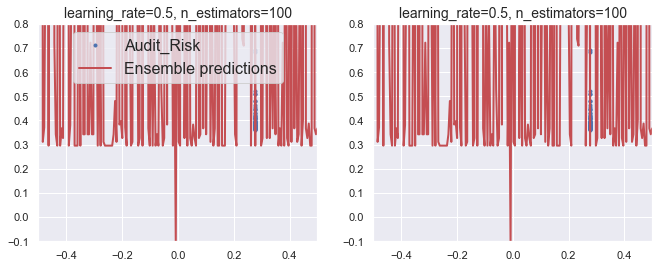

In [995]:
%matplotlib inline
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X_trainval, y_trainval, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X_trainval, y_trainval, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

# PCA on Regression

In [1003]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_trainval = pca.fit_transform(X_trainval)
X_test = pca.transform(X_test)

# KNeighbourRegressor with PCA

In [1014]:
# Now recreating model using grid search
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [1015]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [1016]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 4}
Best cross-validation score: 0.55


In [1017]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.tail())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.000901,0.000300,0.000596,0.000486,6,{'n_neighbors': 6},0.563630,0.722519,0.801065,0.808138,...,0.687089,0.681291,0.671679,0.713814,0.714750,0.718065,0.735296,0.702772,0.702503,0.018049
5,0.000696,0.000455,0.000698,0.000457,7,{'n_neighbors': 7},0.625009,0.675628,0.774968,0.755442,...,0.653415,0.654527,0.639609,0.677320,0.674235,0.709985,0.708599,0.677993,0.675372,0.021512
6,0.000899,0.000538,0.000602,0.000492,8,{'n_neighbors': 8},0.628488,0.667159,0.837987,0.714275,...,0.615784,0.638147,0.605023,0.668015,0.659206,0.666928,0.699915,0.646183,0.647896,0.025886
7,0.000800,0.000400,0.000996,0.000002,9,{'n_neighbors': 9},0.628849,0.668596,0.793898,0.662938,...,0.594986,0.605337,0.597740,0.630044,0.622103,0.652579,0.666667,0.631955,0.625683,0.021560
8,0.000700,0.000458,0.000798,0.000399,10,{'n_neighbors': 10},0.622034,0.681792,0.766160,0.632137,...,0.577809,0.597270,0.577751,0.617122,0.619899,0.631134,0.642543,0.608387,0.608153,0.019788


Text(0.5,0,'k neighbours')

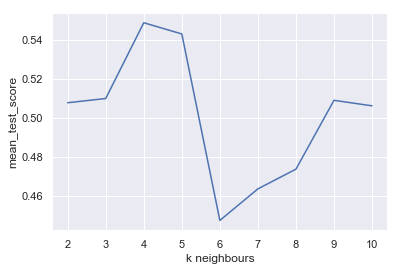

In [1018]:
%matplotlib inline

# PLotting the mean_test_scores Vs no. of neighbours
data= pd.DataFrame(results.mean_test_score,param_grid['n_neighbors'])
sns.lineplot(y=results.mean_test_score,x=param_grid['n_neighbors'],data=data)
plt.xlabel('k neighbours')

In [1019]:
# rebuild a model on the combined training and validation set with 4 nearest neighbour
knn_reg_pca = KNeighborsRegressor(4)
knn_reg_pca.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print("Best parameter: {}".format(best_parameters))
print("Test Accuracy for KNN: {:.2f}".format(knn_reg_pca.score(X_test,y_test)))

Best parameter: {'n_neighbors': 4}
Test Accuracy for KNN: 0.28


# Linear Regression using Normal Equation and PCA

In [1020]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()

scores =[]
for cv in  range(2,11):
    scores.append(cross_val_score(linreg, X_trans_stanscal, y_reg, cv=cv).mean())
print("Cross-validation scores: {}".format(scores))
# print("Average cross-validation score: {:.2f}".format(np.mean(scores)))

Cross-validation scores: [0.13084606923291076, 0.1464005595320749, -0.010117446696833787, -5.788206666947507, -3.4875747028171666, -3.1504591076861126, -29.753470545746932, -29.341209460334117, -25.61115729866836]


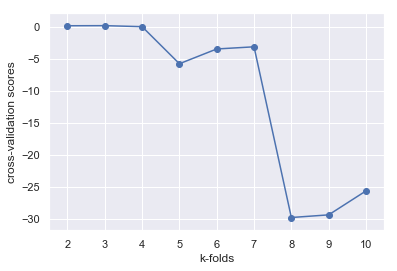

In [1021]:
%matplotlib inline
cv = range(2,11)
data= pd.DataFrame(scores,np.array(cv))
sns.lineplot(y=scores,x=cv,data=data)
plt.xlabel('k-folds')
plt.ylabel('cross-validation scores')
plt.scatter(y=scores,x=cv)

In [1024]:
# Linear Regression for kfold = 3
linreg_pca = LinearRegression()
scores = cross_val_score(linreg_pca, X_trainval, y_trainval, cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8031625  0.73167295 0.51399882]
Average cross-validation score: 0.68


In [1026]:
linreg_pca.fit(X_trainval,y_trainval)

print("Test score for Linear Regression with PCA: {:.2f}".format(linreg_pca.score(X_test,y_test)))

Test score for Linear Regression: 0.29


# Ridge Regressor with PCA

In [1027]:
x_range = [0.01, 0.05, 0.1, 0.5, 1,1.5, 5, 10, 50, 100]
param_grid = {'alpha': x_range}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]}


In [1028]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [1029]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: 0.46


In [1030]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.033310,0.097271,0.000000,0.000000,0.01,{'alpha': 0.01},0.774430,0.771857,0.826815,0.751606,...,0.706239,0.715568,0.716926,0.734208,0.726301,0.763204,0.778171,0.725849,0.731175,0.021237
1,0.000798,0.000399,0.000100,0.000300,0.05,{'alpha': 0.05},0.774435,0.771860,0.826814,0.751667,...,0.706239,0.715568,0.716926,0.734208,0.726301,0.763204,0.778171,0.725849,0.731175,0.021237
2,0.000599,0.000489,0.000299,0.000457,0.1,{'alpha': 0.1},0.774441,0.771863,0.826812,0.751743,...,0.706239,0.715568,0.716926,0.734208,0.726301,0.763204,0.778171,0.725849,0.731175,0.021237
3,0.000898,0.000299,0.000099,0.000297,0.5,{'alpha': 0.5},0.774485,0.771891,0.826797,0.752352,...,0.706239,0.715567,0.716925,0.734208,0.726301,0.763204,0.778171,0.725849,0.731175,0.021237
4,0.001397,0.000488,0.000399,0.000489,1,{'alpha': 1},0.774540,0.771927,0.826777,0.753109,...,0.706238,0.715567,0.716924,0.734208,0.726301,0.763203,0.778171,0.725848,0.731175,0.021237


Text(0.5,0,'alpha')

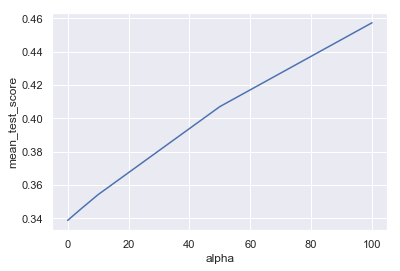

In [1031]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['alpha'])
sns.lineplot(y=results.mean_test_score,x=param_grid['alpha'],data=data)
plt.xlabel('alpha')

In [1053]:
# rebuild a model on the combined training and validation set
ridge_pca = Ridge(alpha=100,random_state=0)
ridge_pca.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print('Test score for Ridge Regressor with PCA: {:.4f}'.format(ridge_pca.score(X_test, y_test)))

Test score for Ridge Regressor with PCA: 0.2692


# Lasso Regressor with PCA

In [1054]:
x_range = [0.01, 0.05, 0.1, 0.5, 1,1.5, 5, 10, 50, 100]
param_grid = {'alpha': x_range}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]}


In [1055]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [1056]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1.5}
Best cross-validation score: 0.56


In [1057]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002296,0.004907,0.000502,0.000502,0.01,{'alpha': 0.01},0.774982,0.771951,0.826911,0.752836,...,0.706237,0.715565,0.716923,0.734205,0.726299,0.763201,0.778168,0.725847,0.731173,0.021236
1,0.000798,0.000399,0.000395,0.000484,0.05,{'alpha': 0.05},0.777103,0.772294,0.827246,0.757622,...,0.706173,0.715497,0.716856,0.734135,0.726248,0.763141,0.778095,0.725794,0.731112,0.021234
2,0.000998,0.000446,0.000298,0.000455,0.1,{'alpha': 0.1},0.779547,0.772640,0.827555,0.763226,...,0.705975,0.715284,0.716649,0.733914,0.726087,0.762953,0.777866,0.725630,0.730920,0.021226
3,0.000598,0.000488,0.000199,0.000399,0.5,{'alpha': 0.5},0.790848,0.772100,0.825640,0.799902,...,0.699640,0.709398,0.710239,0.728272,0.720935,0.757688,0.771067,0.720385,0.725177,0.021140
4,0.000699,0.000457,0.000396,0.000485,1,{'alpha': 1},0.787569,0.762122,0.818874,0.825858,...,0.686273,0.693904,0.694679,0.714918,0.708909,0.744984,0.758944,0.708676,0.712122,0.021700


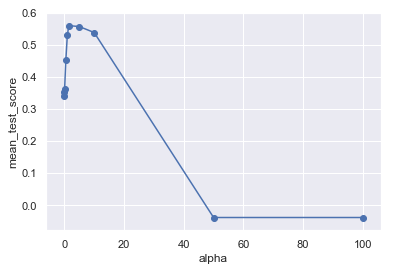

In [1058]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['alpha'])
sns.lineplot(y=results.mean_test_score,x=param_grid['alpha'],data=data)
plt.xlabel('alpha')
plt.scatter(y=results.mean_test_score,x=param_grid['alpha'])

In [1059]:
# rebuild a model on the combined training and validation set with alpha=1.5
lasso_reg_pca = Lasso(alpha=1.5,random_state=0)
lasso_reg_pca.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print('Test score for Lasso Regressor with PCA: {:.4f}'.format(lasso_reg_pca.score(X_test, y_test)))

Test score for Lasso Regressor with PCA: 0.2377


# Polynomial Regressor with PCA

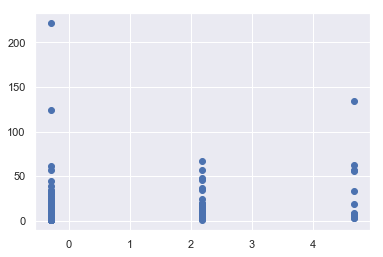

In [1060]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,11].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [1066]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg_poly_pca = LinearRegression()

In [1067]:
scores_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_trainval_poly = poly.fit_transform(X_trainval)
    scores_list.append(cross_val_score(linreg_poly, X_trainval_poly, y_trainval, cv=10).mean())


In [1068]:
print("Cross-validation scores: {}".format(scores_list))

Cross-validation scores: [0.33913024341797177, -45.24483946923779, -5692784.871674189]


We see that we are getting better accuracy for polynomial degree = 1

In [1070]:
# Rebuilding the model with polynomial degree 2
poly = PolynomialFeatures(1)
X_trainval_poly = poly.fit_transform(X_trainval)
X_test_poly = poly.transform(X_test)

linreg_poly_pca.fit(X_trainval_poly, y_trainval) 

# Score for model on testing dataset
print("Test Accuracy for Polynomial Regressor after PCA: {:.4f}".format(linreg_poly_pca.score(X_test_poly,y_test)))

Test Accuracy for Polynomial Regressor after PCA: 0.2852


# Linear SVR after PCA

In [1071]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}


In [1072]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [1073]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000998,0.000002,0.000598,0.000489,0.001,0.001,"{'C': 0.001, 'epsilon': 0.001}",-0.161265,-0.121127,-0.135390,...,-0.076550,-0.080932,-0.078917,-0.086524,-0.078035,-0.078816,-0.092061,-0.081310,-0.080866,0.004603
1,0.001096,0.000300,0.000000,0.000000,0.001,0.01,"{'C': 0.001, 'epsilon': 0.01}",-0.161219,-0.120795,-0.135514,...,-0.076654,-0.080890,-0.078874,-0.086451,-0.077988,-0.078761,-0.091664,-0.080844,-0.080741,0.004507
2,0.000800,0.000400,0.000496,0.000496,0.001,0.1,"{'C': 0.001, 'epsilon': 0.1}",-0.153332,-0.113397,-0.129114,...,-0.071558,-0.076027,-0.074036,-0.080710,-0.073087,-0.073793,-0.086196,-0.075981,-0.075697,0.004279
3,0.000993,0.000446,0.000302,0.000461,0.001,1,"{'C': 0.001, 'epsilon': 1}",-0.089472,-0.050384,-0.079585,...,-0.032280,-0.036080,-0.033554,-0.034706,-0.031766,-0.034257,-0.037805,-0.034243,-0.033888,0.001864
4,0.001297,0.000457,0.000499,0.000499,0.001,10,"{'C': 0.001, 'epsilon': 10}",-0.126558,-0.088379,-0.106386,...,-0.054422,-0.057159,-0.057781,-0.060559,-0.053573,-0.056530,-0.065101,-0.056111,-0.056707,0.003649


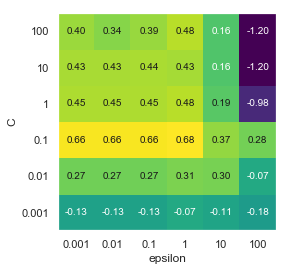

In [1074]:
%matplotlib inline
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='epsilon', xticklabels=param_grid['epsilon'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")


In [1075]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'epsilon': 1}
Best cross-validation score: 0.68


In [1078]:
# rebuild the model on training+validation dataset with best parameters
linsvr_pca = LinearSVR(C=0.1,epsilon=1,random_state=0)
linsvr_pca.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for LinearSVR after PCA: {:.4f}".format(linsvr_pca.score(X_test,y_test)))

Test Accuracy for LinearSVR after PCA: 0.1938


# SVM with kernel after PCA

In [1079]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['poly', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']}


In [1080]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVR(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [1081]:
# Summarizing the grid SearchCV results
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011269,0.001996,0.000700,0.000458,0.001,0.001,poly,"{'C': 0.001, 'epsilon': 0.001, 'kernel': 'poly'}",0.057479,0.177254,...,0.252325,0.244229,0.250533,0.330397,0.306037,0.303587,0.356640,0.301499,0.294278,0.034241
1,0.014961,0.005796,0.000998,0.000448,0.001,0.001,rbf,"{'C': 0.001, 'epsilon': 0.001, 'kernel': 'rbf'}",-0.168245,-0.129709,...,-0.082393,-0.086742,-0.084854,-0.094818,-0.086230,-0.085642,-0.100090,-0.090075,-0.088067,0.005180
2,0.013168,0.006580,0.000994,0.000631,0.001,0.01,poly,"{'C': 0.001, 'epsilon': 0.01, 'kernel': 'poly'}",0.057669,0.177005,...,0.252180,0.244322,0.250585,0.330314,0.306163,0.303661,0.356562,0.301316,0.294256,0.034219
3,0.012163,0.002268,0.000998,0.000001,0.001,0.01,rbf,"{'C': 0.001, 'epsilon': 0.01, 'kernel': 'rbf'}",-0.168699,-0.130028,...,-0.082452,-0.086843,-0.085055,-0.094910,-0.086373,-0.085583,-0.100047,-0.090034,-0.088150,0.005134
4,0.008176,0.000400,0.000898,0.000299,0.001,0.1,poly,"{'C': 0.001, 'epsilon': 0.1, 'kernel': 'poly'}",0.057139,0.177109,...,0.252444,0.243861,0.250035,0.330101,0.305602,0.303319,0.356108,0.301106,0.293984,0.034179


In [1082]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.56


In [1083]:
# rebuild the model on training+validation dataset
svr_pca = SVR(C=100,epsilon=0.01,kernel='rbf')
svr_pca.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for SVR with kernel: {:.4f}".format(svr_pca.score(X_test,y_test)))

Test Accuracy for SVR with kernel: 0.0841


In [284]:
print("Test Accuracy for KNN Regressor: {:.2f}".format(knn_reg.score(X_test,y_test)))
print("Test score for Linear Regressor: {:.2f}".format(linreg.score(X_test,y_test)))
print('Test score for Ridge Regressor: {:.4f}'.format(ridge.score(X_test, y_test)))
print('Test score for Lasso Regressor: {:.4f}'.format(lasso_reg.score(X_test, y_test)))
print("Test Accuracy for Polynomial Regressor: {:.4f}".format(linreg_poly.score(X_test_poly,y_test)))
print("Test Accuracy for LinearSVR: {:.4f}".format(linsvr.score(X_test,y_test)))
print("Test Accuracy for SVR with kernel: {:.4f}".format(svr.score(X_test,y_test)))

Test Accuracy for KNN Regressor: 0.22
Test score for Linear Regressor: 0.41
Test score for Ridge Regressor: 0.3330
Test score for Lasso Regressor: 0.3344
Test Accuracy for Polynomial Regressor: 0.9984
Test Accuracy for LinearSVR: 0.3152
Test Accuracy for SVR with kernel: -0.6198


In [1085]:
# After PCA
print("Test Accuracy for KNN Regressor after PCA: {:.2f}".format(knn_reg_pca.score(X_test,y_test)))
print("Test score for Linear Regressor after PCA: {:.2f}".format(linreg_pca.score(X_test,y_test)))
print('Test score for Ridge Regressor after PCA: {:.4f}'.format(ridge_pca.score(X_test, y_test)))
print('Test score for Lasso Regressor after PCA: {:.4f}'.format(lasso_reg_pca.score(X_test, y_test)))
print("Test Accuracy for Polynomial Regressor after PCA: {:.4f}".format(linreg_poly_pca.score(X_test_poly,y_test)))
print("Test Accuracy for LinearSVR after PCA: {:.4f}".format(linsvr_pca.score(X_test,y_test)))
print("Test Accuracy for SVR with kernel after PCA: {:.4f}".format(svr_pca.score(X_test,y_test)))

Test Accuracy for KNN Regressor: 0.28
Test score for Linear Regressor: 0.29
Test score for Ridge Regressor: 0.2692
Test score for Lasso Regressor: 0.2377
Test Accuracy for Polynomial Regressor: 0.2852
Test Accuracy for LinearSVR: 0.1938
Test Accuracy for SVR with kernel: 0.0841


# It is Observed that PCA does not help in most of the algorithms used on our dataset except for KNN regressor and SVR with kernel trick

# Deep Learning for Regressor

In [1088]:
y_reg = df['Audit_Risk']

# Train Validation Test Split

In [651]:
from sklearn.model_selection import train_test_split
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_trans_stanscal, y_reg, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 434   size of validation set: 145   size of test set: 194



In [1120]:
%matplotlib inline
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# step 1: build the model
model = Sequential()
# input layer
model.add(Dense(30, input_dim = 784, activation='relu'))
# 30 nodes in first layer , if you want to consider batch we will use input_shape = (784,12)

# hidden layer (no hidden layer here)
# model.add(Dense(20, activation='relu'))

# output layer
model.add(Dense(10, activation = 'softmax'))

#In case of regression no activation function in output layer
#triangular funnel shape of layers 30,20,10

# Classification Task

In [25]:
y_reg = df['Risk']

# Train Validation Test Split

In [26]:
from sklearn.model_selection import train_test_split
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_trans_stanscal, y_reg, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 434   size of validation set: 145   size of test set: 194



# Bagging

# KNN Classfier with Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_class_bag = KNeighborsClassifier(3)
bag_knn_class = BaggingClassifier(knn_class_bag, n_estimators=100, max_samples=80, bootstrap=True, random_state=0)

bag_knn_class.fit(X_trainval, y_trainval)

C:\Users\prava\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=80, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [46]:
print('Train score for Knn Classifier with bagging : {:.2f}'.format(bag_knn_class.score(X_trainval, y_trainval)))
print('Test score for KNN Classifier with bagging: {:.2f}'.format(bag_knn_class.score(X_test, y_test)))

Train score for Knn Classifier with bagging : 0.97
Test score for KNN Classifier with bagging: 0.95


# Decision Tree Classifier with bagging

Trying to find best parameters for bagging using grid search on Decision Tree Regressor

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],'max_samples' : [0.05, 0.1, 0.2, 0.5]}

bag_dtree_class = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),bootstrap=True, random_state=0,n_estimators = 100, 
                                              max_features = 0.5),param_grid,n_jobs=-1)
bag_dtree_class.fit(X_trainval, y_trainval)

print("Training score: {:.2f}".format(bag_dtree_class.score(X_trainval,y_trainval)))
print("Tesing Score: {:.2f}".format(bag_dtree_class.score(X_test,y_test)))

Training score: 1.00
Tesing Score: 0.99


In [49]:
print("Best Parameters: {}".format(bag_dtree_class.best_params_))

Best Parameters: {'base_estimator__max_depth': 4, 'max_samples': 0.5}


In [50]:
# Rebuilding the BaggingClassifier
bag_dt_c = BaggingClassifier(DecisionTreeClassifier(max_depth=2),max_samples=0.5,bootstrap=True, random_state=0,n_estimators = 100,n_jobs=-1)
bag_dt_c.fit(X_trainval,y_trainval)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [51]:
print("Training score for Decision Tree Classfier with Bagging : {:.2f}".format(bag_dt_c.score(X_trainval,y_trainval)))
print("Tesing Score for Decision Tree Classifier with Bagging: {:.2f}".format(bag_dt_c.score(X_test,y_test)))

Training score for Decision Tree Classfier with Bagging : 0.99
Tesing Score for Decision Tree Classifier with Bagging: 0.99


# Pasting

# KNN Classifier with Pasting

In [1118]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_class_pas = KNeighborsClassifier(3)
pas_knn_class = BaggingClassifier(knn_class_pas, n_estimators=100, max_samples=80, bootstrap=False, random_state=0)

pas_knn_class.fit(X_trainval, y_trainval)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=80, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [1119]:
print('Train score for KNN Classifier with pasting : {:.2f}'.format(pas_knn_class.score(X_trainval, y_trainval)))
print('Test score for KNN Classifier with pasting: {:.2f}'.format(pas_knn_class.score(X_test, y_test)))

Train score for KNN Classifier with pasting : 0.97
Test score for KNN Classifier with pasting: 0.96


# Logistic Regression with Pasting

In [54]:
from sklearn.linear_model import LogisticRegression


pas_lr_class = BaggingClassifier(LogisticRegression(), n_estimators=1, max_samples=20, bootstrap=False, random_state=0)

pas_lr_class.fit(X_trainval,y_trainval)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=20, n_estimators=1, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [55]:
print('Train score for Logistic Classifier with Pasting : {:.2f}'.format(pas_lr_class.score(X_trainval, y_trainval)))
print('Test score for Logistic Classifier with Pasting: {:.2f}'.format(pas_lr_class.score(X_test, y_test)))

Train score for Logistic Classifier with Pasting : 0.96
Test score for Logistic Classifier with Pasting: 0.97


# Adaboost

# Decision Classifier with Adaboost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada_dtree_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=10, learning_rate=0.005, random_state=0)
ada_dtree_class.fit(X_trainval, y_trainval)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.005, n_estimators=10, random_state=0)

In [76]:
print('Train score for Decision Tree Classifier with Adaboost: {:.2f}'.format(ada_dtree_class.score(X_trainval, y_trainval)))
print('Test score for Decision Tree Classifier with Adaboost: {:.2f}'.format(ada_dtree_class.score(X_test, y_test)))

Train score for Decision Tree Classifier with Adaboost: 0.94
Test score for Decision Tree Classifier with Adaboost: 0.93


In [78]:
ada_dtree_class.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

([<matplotlib.axis.YTick at 0x2717a186a90>,
 <a list of 16 Text yticklabel objects>)

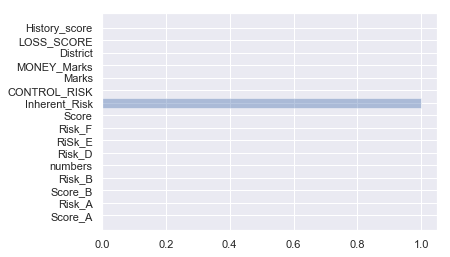

In [79]:
%matplotlib inline

y_list = ada_dtree_class.feature_importances_
y_pos = np.arange(len(y_list))
features = x_reg.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

# Linear SVC Classifier with Adaboost

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

ada_linsvc_class = AdaBoostClassifier(LinearSVC(random_state=0), n_estimators=5, learning_rate=0.01, random_state=0,algorithm='SAMME')
ada_linsvc_class.fit(X_trainval, y_trainval)
print('Train score for Decision Tree Classifier with Adaboost: {:.2f}'.format(ada_linsvc_class.score(X_trainval, y_trainval)))
print('Test score for Decision Tree Classifier with Adaboost: {:.2f}'.format(ada_linsvc_class.score(X_test, y_test)))

Train score for Decision Tree Classifier with Adaboost: 0.98
Test score for Decision Tree Classifier with Adaboost: 0.98


# Gradient Boosting Classification Task

In [27]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt_class = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.001, random_state=42,)
gbrt_class.fit(X_trainval, y_trainval)
print('Train score for Gradient Boost Classifier: {:.2f}'.format(gbrt_class.score(X_trainval, y_trainval)))
print('Test score for Gradient Boost Classifier: {:.2f}'.format(gbrt_class.score(X_test, y_test)))

Train score for Gradient Boost Classifier: 0.99
Test score for Gradient Boost Classifier: 0.99


#Grid Search on Gradient Boosting

In [31]:
param_grid = {'max_depth':[2,3,4],'learning_rate': [0.01,0.05,0.1,0.2,0.3], 
              'n_estimators': [1,5,10,50,100,200]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [2, 3, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'n_estimators': [1, 5, 10, 50, 100, 200]}


In [32]:
from sklearn.model_selection import GridSearchCV
gridsearch_gbrt_class = GridSearchCV(GradientBoostingClassifier(),param_grid,n_jobs=-1)
gridsearch_gbrt_class.fit(X_trainval,y_trainval)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'n_estimators': [1, 5, 10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
gridsearch_gbrt_class.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

In [58]:
# Rebuilding model with these parameters

gbrt_class = GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate=0.005, random_state=42)
gbrt_class.fit(X_trainval, y_trainval)
# print('Train score for Gradient Boost: {:.2f}'.format(gbrt_slow.score(X_trainval, y_trainval)))
print('Test score for Gradient Boost Classifier: {:.2f}'.format(gbrt_class.score(X_test, y_test)))

Test score for Gradient Boost Classifier: 0.99


# PCA on Classfication

In [59]:
from sklearn.decomposition import PCA
pca_class = PCA(n_components=0.95)
X_trainval = pca_class.fit_transform(X_trainval)
X_test = pca_class.transform(X_test)

# KNeighbour Classifier

In [60]:
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

In [62]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.97


In [64]:
# Summarizing the grid SearchCV results

import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.tail())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.001696,0.000639,0.001402,0.000494,6,{'n_neighbors': 6},1.0,0.915254,0.965517,0.982759,...,0.957774,0.957774,0.965451,0.961612,0.963532,0.963602,0.957854,0.963602,0.961235,0.003419
5,0.001199,0.000398,0.001694,0.001268,7,{'n_neighbors': 7},1.0,0.915254,0.965517,0.982759,...,0.963532,0.963532,0.965451,0.961612,0.967370,0.967433,0.965517,0.963602,0.964689,0.002147
6,0.000899,0.000300,0.000798,0.000399,8,{'n_neighbors': 8},1.0,0.915254,0.965517,0.982759,...,0.963532,0.961612,0.963532,0.959693,0.963532,0.961686,0.961686,0.967433,0.962578,0.002161
7,0.000798,0.000399,0.000798,0.000399,9,{'n_neighbors': 9},1.0,0.932203,0.965517,0.982759,...,0.967370,0.967370,0.967370,0.961612,0.965451,0.965517,0.963602,0.967433,0.965073,0.002565
8,0.000798,0.000399,0.000897,0.000299,10,{'n_neighbors': 10},1.0,0.932203,0.965517,0.982759,...,0.963532,0.957774,0.963532,0.961612,0.963532,0.967433,0.959770,0.961686,0.961810,0.003166


Text(0.5,0,'k neighbours')

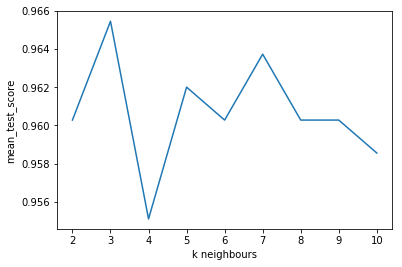

In [65]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['n_neighbors'])
sns.lineplot(y=results.mean_test_score,x=param_grid['n_neighbors'],data=data)
plt.xlabel('k neighbours')

In [67]:
# rebuild a model on the combined training and validation set with 2 neighbours
knn_class_pca = KNeighborsClassifier(3)
knn_class_pca.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print("Test Accuracy for KNN Classifier after PCA: {:.2f}".format(knn_class_pca.score(X_test,y_test)))

Test Accuracy for KNN Classifier after: 0.96


In [70]:
pred_knn_class_pca = knn_class_pca.predict(X_test)
from sklearn.metrics import confusion_matrix

print("Confusion matrix for KNN Classifier after PCA:\n{}".format(confusion_matrix(y_test, pred_knn_class_pca)))

Confusion matrix for KNN Classifier after PCA:
[[121   0]
 [  8  65]]


# Linear SVC after PCA

In [71]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [500,1000,1500,5000,7500, 10000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [500, 1000, 1500, 5000, 7500, 10000]}


In [72]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [500, 1000, 1500, 5000, 7500, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
# Summarizing GridSearchCV results

import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001199,0.000398,0.000397,0.000486,0.001,500,"{'C': 0.001, 'max_iter': 500}",0.966102,0.898305,0.982759,...,0.940499,0.944338,0.944338,0.946257,0.948177,0.950192,0.942529,0.938697,0.944733,0.003703
1,0.000996,0.000446,0.000698,0.000457,0.001,1000,"{'C': 0.001, 'max_iter': 1000}",0.966102,0.898305,0.982759,...,0.940499,0.944338,0.944338,0.946257,0.948177,0.950192,0.942529,0.938697,0.944733,0.003703
2,0.001398,0.000487,0.000496,0.000496,0.001,1500,"{'C': 0.001, 'max_iter': 1500}",0.966102,0.898305,0.982759,...,0.940499,0.944338,0.944338,0.946257,0.948177,0.950192,0.942529,0.938697,0.944733,0.003703
3,0.001195,0.000399,0.000199,0.000399,0.001,5000,"{'C': 0.001, 'max_iter': 5000}",0.966102,0.898305,0.982759,...,0.940499,0.944338,0.944338,0.946257,0.948177,0.950192,0.942529,0.938697,0.944733,0.003703
4,0.001296,0.000457,0.000200,0.000400,0.001,7500,"{'C': 0.001, 'max_iter': 7500}",0.966102,0.898305,0.982759,...,0.940499,0.944338,0.944338,0.946257,0.948177,0.950192,0.942529,0.938697,0.944733,0.003703


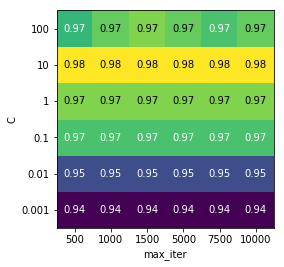

In [74]:
%matplotlib inline
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='max_iter', xticklabels=param_grid['max_iter'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")


In [75]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'max_iter': 500}
Best cross-validation score: 0.98


In [76]:
# rebuild the model on training+validation dataset on the best parameters
linsvc_pca = LinearSVC(C=10,random_state=0,max_iter=500)
linsvc_pca.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for LinearSVC Classifier: {:.4f}".format(linsvc_pca.score(X_test,y_test)))

Test Accuracy for LinearSVC Classifier: 0.9794


In [77]:
pred_linsvc_pca = linsvc_pca.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_linsvc_pca)
print("Confusion matrix for LinearSVC without kernel after pca:\n{}".format(confusion))

Confusion matrix for LinearSVC without kernel after pca:
[[121   0]
 [  4  69]]


# SVC with kernel

In [78]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['poly', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']}


In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [80]:
# Summarizing GridSearchCV results

import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.017254,0.031526,0.001197,0.000598,0.001,0.001,poly,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
1,0.009774,0.002850,0.001398,0.000800,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
2,0.005684,0.001895,0.000997,0.000446,0.001,0.01,poly,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
3,0.007480,0.001357,0.000798,0.000399,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.593220,0.593220,...,0.598848,0.598848,0.598848,0.598848,0.598848,0.599617,0.599617,0.599617,0.599309,0.000480
4,0.003986,0.000438,0.000800,0.000400,0.001,0.1,poly,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}",0.627119,0.661017,...,0.650672,0.646833,0.648752,0.654511,0.658349,0.647510,0.647510,0.653257,0.651509,0.003632


In [81]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.98


In [82]:
# rebuild the model on training+validation dataset with best parameters
svc_kernel_pca = SVC(C=100,gamma=10,kernel='rbf',random_state=0)
svc_kernel_pca.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for SVC with kernel trick after pca: {:.4f}".format(svc_kernel_pca.score(X_test,y_test)))

Test Accuracy for SVC with kernel trick after pca: 0.9588


In [83]:
pred_svc_pca = svc_kernel_pca.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_svc_pca)
print("Confusion matrix for SVC with kernel trick after pca:\n{}".format(confusion))

Confusion matrix for SVC with kernel trick after pca:
[[118   3]
 [  5  68]]


# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
c_range = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C' : c_range}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.98


In [87]:
# rebuild the model on training+validation dataset
log_reg_pca = LogisticRegression(C=10,random_state=0)
log_reg_pca.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for Logistic Regression after PCA: {:.4f}".format(log_reg_pca.score(X_test,y_test)))

Test Accuracy for Logistic Regression: 0.9794


In [88]:
pred_log_reg_pca = log_reg_pca.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_log_reg_pca)
print("Confusion matrix for Logistic Regression after PCA:\n{}".format(confusion))

Confusion matrix for Logistic Regression after PCA:
[[121   0]
 [  4  69]]


# Decision Tree

In [89]:
param_grid = {'max_depth': [2,3,4 ]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [2, 3, 4]}


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [91]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.98


In [92]:
# rebuild the model on training+validation dataset
dtree_pca = DecisionTreeClassifier(max_depth=2,random_state=0)
dtree_pca.fit(X_trainval,y_trainval)

# Score for model on testing dataset
print("Test Accuracy for Decision Tree Classfier after PCA: {:.4f}".format(dtree_pca.score(X_test,y_test)))

Test Accuracy for Decision Tree Classfier: 0.9639


In [93]:
pred_dtree_pca = dtree_pca.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_dtree_pca)
print("Confusion matrix for Decision Tree Classfier after PCA:\n{}".format(confusion))

Confusion matrix for Decision Tree Classfier after PCA:
[[117   4]
 [  3  70]]


# Summary for Classification after PCA

In [94]:
print("\nKNN Classifier")
print(confusion_matrix(y_test, pred_knn_class_pca))
print("\nLinearSVC Classifier:")
print(confusion_matrix(y_test, pred_linsvc_pca))
print("\nSVC with kernel Classifier")
print(confusion_matrix(y_test, pred_svc_pca))
print("\nLogistic Regression Classifier")
print(confusion_matrix(y_test, pred_log_reg_pca))
print("\nDecision Tree Classifier:")
print(confusion_matrix(y_test, pred_dtree_pca))


KNN Classifier
[[121   0]
 [  8  65]]

LinearSVC Classifier:
[[121   0]
 [  4  69]]

SVC with kernel Classifier
[[118   3]
 [  5  68]]

Logistic Regression Classifier
[[121   0]
 [  4  69]]

Decision Tree Classifier:
[[117   4]
 [  3  70]]


In [97]:
print("Test Accuracy for KNN Classifier after PCA: {:.2f}".format(knn_class_pca.score(X_test,y_test)))
print("Test Accuracy for LinearSVC Classifier: {:.4f}".format(linsvc_pca.score(X_test,y_test)))
print("Test Accuracy for SVC with kernel trick after pca: {:.4f}".format(svc_kernel_pca.score(X_test,y_test)))
print("Test Accuracy for Logistic Regression after PCA: {:.4f}".format(log_reg_pca.score(X_test,y_test)))
print("Test Accuracy for Decision Tree Classfier after PCA: {:.4f}".format(dtree_pca.score(X_test,y_test)))

Test Accuracy for KNN Classifier after PCA: 0.96
Test Accuracy for LinearSVC Classifier: 0.9794
Test Accuracy for SVC with kernel trick after pca: 0.9588
Test Accuracy for Logistic Regression after PCA: 0.9794
Test Accuracy for Decision Tree Classfier after PCA: 0.9639
